In [93]:
# in this notebook, I will make figures for the hydrologic sciences symposium

# plots I want to focus on are:
# topographic evolution
# sedimentation rate
# bedrock erosion rate

# for topograpy, the point is to show a "hole" being dug at the mountain front
# emphasize this by showing how sediment thins, and bedrock erosion rate subsequently increases

# try to make animation functions within the model function, so that animation is automatically output

In [94]:
# star by importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [95]:
# up first, just create a stream power model and a two lithology model and run them both to steady state

In [96]:
# set up basic stuff

# grid
dx_1 = 1000
x_1 = np.arange(0, 100000, dx_1)

# elevation
eta_1 = np.zeros(len(x_1))

# set reasonable runoff rate in m/yr, see Rossi et al 2016 supplemental
# r_mtn_1 = np.zeros(len(x_1))
# r_mtn_1[:25] = 0.3

# r_pln_1 = np.zeros(len(x_1))
# r_pln_1[25:] = 0.3

r_mtn_1 = 0.3
r_pln_1 = 0.3

# erodibility has both hard and soft rocks
k_1 = np.zeros(len(x_1))
k_1[:25] = 0.0001
k_1[25:] = 0.001
# k_1[:] = 0.0001

In [97]:
# now make the first function: pure stream power
# take out adaptive timstep stuff, only add it back in if it seems necessary

def stream_power(x,
                 dx,
                 eta,
                 k,
                 r_mtn,
                 r_pln,
                 c = 1, # should be 0.041, from W & S '19 (assuming constant geomorphically effective flow)
                 baselevel_rate = 0.001, # uplifting 1 mm/yr
                 num_steps = 100000, 
                 porosity = 0.55):
    
    bedrock_ero = np.zeros(len(x))  # bedrock erosion rate
    bedrock_ero[-1] = baselevel_rate
    
    x_m = x[24]
    q = np.zeros(len(x))
    mtns = np.where(x <= x_m)[0]
    q_mtns = r_mtn * x[mtns]
    # q_mtn_outlet = q[24]
    # plns = np.where(x > x_m)[0]
    q_plns = q_mtns[-1] + (r_pln * (x[25:] - x_m))
    q = np.concatenate((q_mtns, q_plns), axis = 0)
    
    # q = (r_mtn * x) + (r_pln * x)  # discharge = distance downstream (first node is left edge of 0th cell)
    # r_mtn, like k_sed, will just be zeros everywhere not mtns
    dt = 0.2 * dx * dx / (c*q[-1])  # "global" time-step size # mult by 0.2
    
    for i in range(num_steps):

        # first calculate rates
        
        #  calc slope
        S = -np.diff(eta)/dx
        
        #  calc bedrock erosion rate from stream power (plucking)
        bedrock_ero[:-1] = k[1:] * q[1:] * S
        
        #  lower baselevel
        eta[-1] -= baselevel_rate * dt 
        
        #  calc change in bedrock elev
        eta[:-1] -= bedrock_ero[:-1] * dt
        
        if any(bedrock_ero[:] != baselevel_rate):
            continue
        else:
            break
            
        
    return (q, S, bedrock_ero, eta, i)

In [98]:
# now create an input experiment
stream_power_ss = [x_1, dx_1, eta_1, k_1, r_mtn_1, r_pln_1]

# run experiment and catch outputs!
(discharge_SP,
 slope_SP,
 bedrock_erosion_rate_SP,
 topography_SP,
 i_SP) = stream_power(*stream_power_ss)

In [99]:
# check for ss condition
print(bedrock_erosion_rate_SP)

[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001]


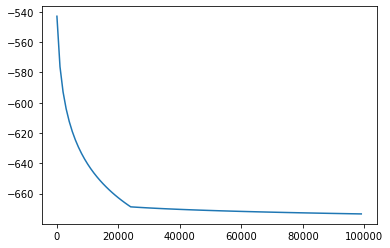

In [100]:
plt.plot(x_1, topography_SP)
plt.show()

In [101]:
# lowest_point = -topography_SP[-1]

In [102]:
upstream_tilt_factor = np.linspace(270, 1, 100)

tilted_eta_SP = topography_SP + upstream_tilt_factor

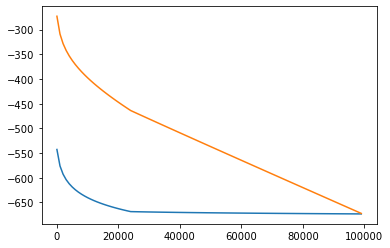

In [103]:
# okay, now check out the tilted vs non-tilted topo to make sure it looks right
plt.plot(x_1, topography_SP)
plt.plot(x_1, tilted_eta_SP)

In [104]:
# neato, looks good
# now we want to take the tilted topo and put it into a new run of the stream power model
# look back at GSA figs notebook to see if we need to make copies of stuff to avoid overwriting

# from GSA notebook ANEW, looks like we should make copies of everything output, 
# but those copies don't become new inputs
# just save them for plotting
# like so

discharge_SP_copy = discharge_SP.copy()
slope_SP_copy = slope_SP.copy()
bedrock_erosion_rate_SP_copy = bedrock_erosion_rate_SP.copy()
topography_SP_copy = topography_SP.copy()

In [105]:
# make copies of input topo (tilted topo)
#### uncomment??? topography_SP_copy = topography_SP.copy()
tilted_eta_SP_copy = tilted_eta_SP.copy()

tilted_eta_1 = tilted_eta_SP.copy()
tilted_eta_5 = tilted_eta_SP.copy()
tilted_eta_10 = tilted_eta_SP.copy()
tilted_eta_25 = tilted_eta_SP.copy()
tilted_eta_50 = tilted_eta_SP.copy()
tilted_eta_100 = tilted_eta_SP.copy()
tilted_eta_250 = tilted_eta_SP.copy()
tilted_eta_500 = tilted_eta_SP.copy()
tilted_eta_1000 = tilted_eta_SP.copy()
tilted_eta_5000 = tilted_eta_SP.copy()
tilted_eta_10000 = tilted_eta_SP.copy()
tilted_eta_25000 = tilted_eta_SP.copy()
tilted_eta_50000 = tilted_eta_SP.copy()

In [106]:
# now rerun model back to steady state with tilted topo as an input

# create an input experiment
stream_power_ss_tilted = [x_1, dx_1, tilted_eta_SP, k_1, r_mtn_1, r_pln_1]

# run experiment and catch outputs!
(tilted_discharge_SP,
 tilted_slope_SP,
 tilted_bedrock_erosion_rate_SP,
 tilted_topography_SP,
 tilted_i_SP) = stream_power(*stream_power_ss_tilted)

In [107]:
# tilted_eta_SP_copy = tilted_topography_SP.copy()

In [108]:
# check for ss condition
print(tilted_bedrock_erosion_rate_SP)

[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001]


In [109]:
# now designing experiments to capture time slices post-tilting with sp model
# want time slices at 1, 5, 10, 25, 50, 100, 250, 500, 1000, 5000, 10000, 25000, 50000, 100000
# (alrady have the last one [stream_power_ss_tilted])

# design input experiments
sp_tilted_1 = [x_1, dx_1, tilted_eta_1, k_1, r_mtn_1, r_pln_1, 1, 0.001, 1]
sp_tilted_5 = [x_1, dx_1, tilted_eta_5, k_1, r_mtn_1, r_pln_1, 1, 0.001, 5]
sp_tilted_10 = [x_1, dx_1, tilted_eta_10, k_1, r_mtn_1, r_pln_1, 1, 0.001, 10]
sp_tilted_25 = [x_1, dx_1, tilted_eta_25, k_1, r_mtn_1, r_pln_1, 1, 0.001, 25]
sp_tilted_50 = [x_1, dx_1, tilted_eta_50, k_1, r_mtn_1, r_pln_1, 1, 0.001, 50]
sp_tilted_100 = [x_1, dx_1, tilted_eta_100, k_1, r_mtn_1, r_pln_1, 1, 0.001, 100]
sp_tilted_250 = [x_1, dx_1, tilted_eta_250, k_1, r_mtn_1, r_pln_1, 1, 0.001, 250]
sp_tilted_500 = [x_1, dx_1, tilted_eta_500, k_1, r_mtn_1, r_pln_1, 1, 0.001, 500]
sp_tilted_1000 = [x_1, dx_1, tilted_eta_1000, k_1, r_mtn_1, r_pln_1, 1, 0.001, 1000]
sp_tilted_5000 = [x_1, dx_1, tilted_eta_5000, k_1, r_mtn_1, r_pln_1, 1, 0.001, 5000]
sp_tilted_10000 = [x_1, dx_1, tilted_eta_10000, k_1, r_mtn_1, r_pln_1, 1, 0.001, 10000]
sp_tilted_25000 = [x_1, dx_1, tilted_eta_25000, k_1, r_mtn_1, r_pln_1, 1, 0.001, 25000]
sp_tilted_50000 = [x_1, dx_1, tilted_eta_50000, k_1, r_mtn_1, r_pln_1, 1, 0.001, 50000]
# sp_tilted_100000 = [x_1, dx_1, tilted_eta_SP, k_1, r_mtn_1, r_pln_1, 1, 0.001, 100000]

In [110]:
# now run experiments, making copies after each
(discharge_SP_tilt_1,
 slope_SP_tilt_1,
 bedrock_erosion_rate_SP_tilt_1,
 topography_SP_tilt_1,
 i_SP_tilt_1) = stream_power(*sp_tilted_1)

discharge_SP_tilt_1_copy = discharge_SP_tilt_1.copy()
slope_SP_tilt_1_copy = slope_SP_tilt_1.copy()
bedrock_erosion_rate_SP_tilt_1_copy = bedrock_erosion_rate_SP_tilt_1.copy()
topography_SP_tilt_1_copy = topography_SP_tilt_1.copy()

In [111]:
(discharge_SP_tilt_5,
 slope_SP_tilt_5,
 bedrock_erosion_rate_SP_tilt_5,
 topography_SP_tilt_5,
 i_SP_tilt_5) = stream_power(*sp_tilted_5)

discharge_SP_tilt_5_copy = discharge_SP_tilt_5.copy()
slope_SP_tilt_5_copy = slope_SP_tilt_5.copy()
bedrock_erosion_rate_SP_tilt_5_copy = bedrock_erosion_rate_SP_tilt_5.copy()
topography_SP_tilt_5_copy = topography_SP_tilt_5.copy()

In [112]:
(discharge_SP_tilt_10,
 slope_SP_tilt_10,
 bedrock_erosion_rate_SP_tilt_10,
 topography_SP_tilt_10,
 i_SP_tilt_10) = stream_power(*sp_tilted_10)

discharge_SP_tilt_10_copy = discharge_SP_tilt_10.copy()
slope_SP_tilt_10_copy = slope_SP_tilt_10.copy()
bedrock_erosion_rate_SP_tilt_10_copy = bedrock_erosion_rate_SP_tilt_10.copy()
topography_SP_tilt_10_copy = topography_SP_tilt_10.copy()

In [113]:
(discharge_SP_tilt_25,
 slope_SP_tilt_25,
 bedrock_erosion_rate_SP_tilt_25,
 topography_SP_tilt_25,
 i_SP_tilt_25) = stream_power(*sp_tilted_25)

discharge_SP_tilt_25_copy = discharge_SP_tilt_25.copy()
slope_SP_tilt_25_copy = slope_SP_tilt_25.copy()
bedrock_erosion_rate_SP_tilt_25_copy = bedrock_erosion_rate_SP_tilt_25.copy()
topography_SP_tilt_25_copy = topography_SP_tilt_25.copy()

In [114]:
(discharge_SP_tilt_50,
 slope_SP_tilt_50,
 bedrock_erosion_rate_SP_tilt_50,
 topography_SP_tilt_50,
 i_SP_tilt_50) = stream_power(*sp_tilted_50)

discharge_SP_tilt_50_copy = discharge_SP_tilt_50.copy()
slope_SP_tilt_50_copy = slope_SP_tilt_50.copy()
bedrock_erosion_rate_SP_tilt_50_copy = bedrock_erosion_rate_SP_tilt_50.copy()
topography_SP_tilt_50_copy = topography_SP_tilt_50.copy()

In [115]:
(discharge_SP_tilt_100,
 slope_SP_tilt_100,
 bedrock_erosion_rate_SP_tilt_100,
 topography_SP_tilt_100,
 i_SP_tilt_100) = stream_power(*sp_tilted_100)

discharge_SP_tilt_100_copy = discharge_SP_tilt_100.copy()
slope_SP_tilt_100_copy = slope_SP_tilt_100.copy()
bedrock_erosion_rate_SP_tilt_100_copy = bedrock_erosion_rate_SP_tilt_100.copy()
topography_SP_tilt_100_copy = topography_SP_tilt_100.copy()

In [116]:
(discharge_SP_tilt_250,
 slope_SP_tilt_250,
 bedrock_erosion_rate_SP_tilt_250,
 topography_SP_tilt_250,
 i_SP_tilt_250) = stream_power(*sp_tilted_250)

discharge_SP_tilt_250_copy = discharge_SP_tilt_250.copy()
slope_SP_tilt_250_copy = slope_SP_tilt_250.copy()
bedrock_erosion_rate_SP_tilt_250_copy = bedrock_erosion_rate_SP_tilt_250.copy()
topography_SP_tilt_250_copy = topography_SP_tilt_250.copy()

In [117]:
(discharge_SP_tilt_500,
 slope_SP_tilt_500,
 bedrock_erosion_rate_SP_tilt_500,
 topography_SP_tilt_500,
 i_SP_tilt_500) = stream_power(*sp_tilted_500)

discharge_SP_tilt_500_copy = discharge_SP_tilt_500.copy()
slope_SP_tilt_500_copy = slope_SP_tilt_500.copy()
bedrock_erosion_rate_SP_tilt_500_copy = bedrock_erosion_rate_SP_tilt_500.copy()
topography_SP_tilt_500_copy = topography_SP_tilt_500.copy()

In [118]:
(discharge_SP_tilt_1000,
 slope_SP_tilt_1000,
 bedrock_erosion_rate_SP_tilt_1000,
 topography_SP_tilt_1000,
 i_SP_tilt_1000) = stream_power(*sp_tilted_1000)

discharge_SP_tilt_1000_copy = discharge_SP_tilt_1000.copy()
slope_SP_tilt_1000_copy = slope_SP_tilt_1000.copy()
bedrock_erosion_rate_SP_tilt_1000_copy = bedrock_erosion_rate_SP_tilt_1000.copy()
topography_SP_tilt_1000_copy = topography_SP_tilt_1000.copy()

In [119]:
(discharge_SP_tilt_5000,
 slope_SP_tilt_5000,
 bedrock_erosion_rate_SP_tilt_5000,
 topography_SP_tilt_5000,
 i_SP_tilt_5000) = stream_power(*sp_tilted_5000)

discharge_SP_tilt_5000_copy = discharge_SP_tilt_5000.copy()
slope_SP_tilt_5000_copy = slope_SP_tilt_5000.copy()
bedrock_erosion_rate_SP_tilt_5000_copy = bedrock_erosion_rate_SP_tilt_5000.copy()
topography_SP_tilt_5000_copy = topography_SP_tilt_5000.copy()

In [120]:
(discharge_SP_tilt_10000,
 slope_SP_tilt_10000,
 bedrock_erosion_rate_SP_tilt_10000,
 topography_SP_tilt_10000,
 i_SP_tilt_10000) = stream_power(*sp_tilted_10000)

discharge_SP_tilt_10000_copy = discharge_SP_tilt_10000.copy()
slope_SP_tilt_10000_copy = slope_SP_tilt_10000.copy()
bedrock_erosion_rate_SP_tilt_10000_copy = bedrock_erosion_rate_SP_tilt_10000.copy()
topography_SP_tilt_10000_copy = topography_SP_tilt_10000.copy()

In [121]:
(discharge_SP_tilt_25000,
 slope_SP_tilt_25000,
 bedrock_erosion_rate_SP_tilt_25000,
 topography_SP_tilt_25000,
 i_SP_tilt_25000) = stream_power(*sp_tilted_25000)

discharge_SP_tilt_25000_copy = discharge_SP_tilt_25000.copy()
slope_SP_tilt_25000_copy = slope_SP_tilt_25000.copy()
bedrock_erosion_rate_SP_tilt_25000_copy = bedrock_erosion_rate_SP_tilt_25000.copy()
topography_SP_tilt_25000_copy = topography_SP_tilt_25000.copy()

In [122]:
(discharge_SP_tilt_50000,
 slope_SP_tilt_50000,
 bedrock_erosion_rate_SP_tilt_50000,
 topography_SP_tilt_50000,
 i_SP_tilt_50000) = stream_power(*sp_tilted_50000)

discharge_SP_tilt_50000_copy = discharge_SP_tilt_50000.copy()
slope_SP_tilt_50000_copy = slope_SP_tilt_50000.copy()
bedrock_erosion_rate_SP_tilt_50000_copy = bedrock_erosion_rate_SP_tilt_50000.copy()
topography_SP_tilt_50000_copy = topography_SP_tilt_50000.copy()

In [123]:
# okay, now let's make some topo evolution plots!
# we know that the profiles will have eroded down, 
# and we want to adjust them all back up to having the same outlet elevation
# so let's do that first

difference_1 = topography_SP[-1] - topography_SP_tilt_1_copy[-1]
difference_5 = topography_SP[-1] - topography_SP_tilt_5_copy[-1]
difference_10 = topography_SP[-1] - topography_SP_tilt_10_copy[-1]
difference_25 = topography_SP[-1] - topography_SP_tilt_25_copy[-1]
difference_50 = topography_SP[-1] - topography_SP_tilt_50_copy[-1]
difference_100 = topography_SP[-1] - topography_SP_tilt_100_copy[-1]
difference_250 = topography_SP[-1] - topography_SP_tilt_250_copy[-1]
difference_500 = topography_SP[-1] - topography_SP_tilt_500_copy[-1]
difference_1000 = topography_SP[-1] - topography_SP_tilt_1000_copy[-1]
difference_5000 = topography_SP[-1] - topography_SP_tilt_5000_copy[-1]
difference_10000 = topography_SP[-1] - topography_SP_tilt_10000_copy[-1]
difference_25000 = topography_SP[-1] - topography_SP_tilt_25000_copy[-1]
difference_50000 = topography_SP[-1] - topography_SP_tilt_50000_copy[-1]
tilted_diff = topography_SP[-1] - tilted_eta_SP_copy[-1]

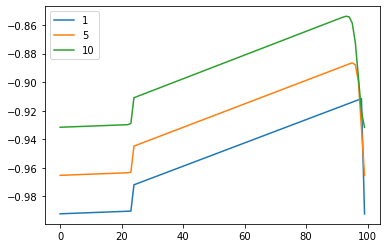

In [124]:
plt.plot(x_1/1000, bedrock_erosion_rate_SP_tilt_1_copy + difference_1, label = '1')
plt.plot(x_1/1000, bedrock_erosion_rate_SP_tilt_5_copy + difference_5, label = '5')
plt.plot(x_1/1000, bedrock_erosion_rate_SP_tilt_10_copy + difference_10, label = '10')
plt.legend()
plt.show()

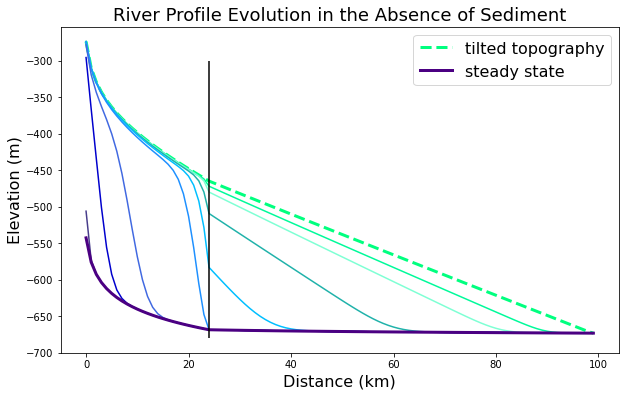

In [125]:
# now see if I can make some plots
plt.figure(figsize = (10, 6))

plt.plot(x_1/1000, topography_SP_tilt_1_copy + difference_1, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# plt.plot(x_1/1000, topography_SP_tilt_5_copy + difference_5, label = '5')
# plt.plot(x_1/1000, topography_SP_tilt_10_copy + difference_10, label = '10')
# plt.plot(x_1/1000, topography_SP_tilt_25_copy + difference_25, label = '25')
plt.plot(x_1/1000, topography_SP_tilt_50_copy + difference_50, color = 'mediumspringgreen')
plt.plot(x_1/1000, topography_SP_tilt_100_copy + difference_100, color = 'aquamarine')
plt.plot(x_1/1000, topography_SP_tilt_250_copy + difference_250, color = 'lightseagreen')
plt.plot(x_1/1000, topography_SP_tilt_500_copy + difference_500, color = 'deepskyblue')
plt.plot(x_1/1000, topography_SP_tilt_1000_copy + difference_1000, color = 'dodgerblue')
plt.plot(x_1/1000, topography_SP_tilt_5000_copy + difference_5000, color = 'royalblue')
plt.plot(x_1/1000, topography_SP_tilt_10000_copy + difference_10000, color = 'mediumblue')
plt.plot(x_1/1000, topography_SP_tilt_25000_copy + difference_25000, color = 'darkslateblue')
# plt.plot(x_1/1000, topography_SP_tilt_50000_copy + difference_50000, label = '50000')
plt.plot(x_1/1000, topography_SP_copy, color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_1/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution in the Absence of Sediment', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -680, ymax = -300, color = 'k')
plt.show()

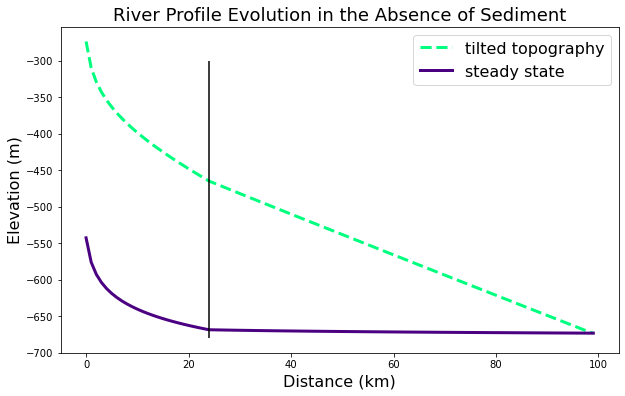

In [129]:
# will need to make pngs and save them to a folder
# plt.savefig('foo.png')

plt.figure(figsize = (10, 6))
plt.plot(x_1/1000, topography_SP_tilt_1_copy + difference_1, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
plt.plot(x_1/1000, topography_SP_copy, color = 'indigo', label = 'steady state', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution in the Absence of Sediment', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -680, ymax = -300, color = 'k')
plt.savefig('hydrosymposium figs/sp_tilt_evolution/1.png')

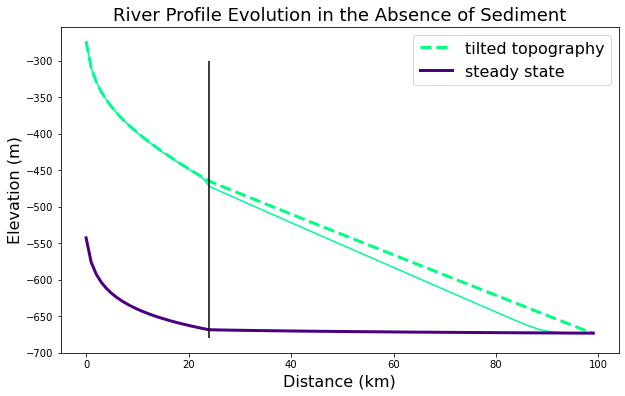

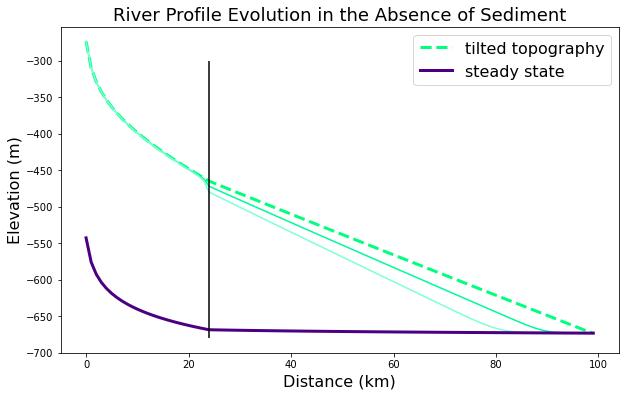

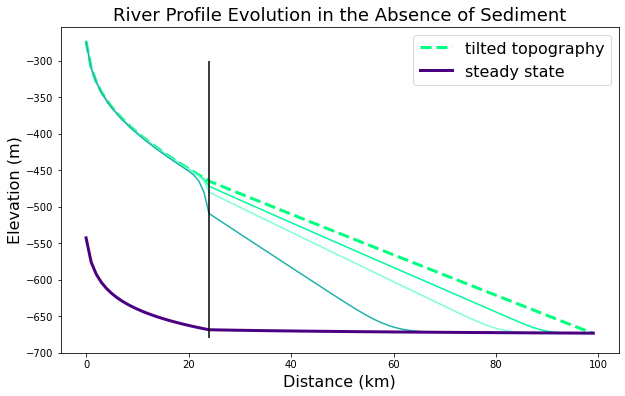

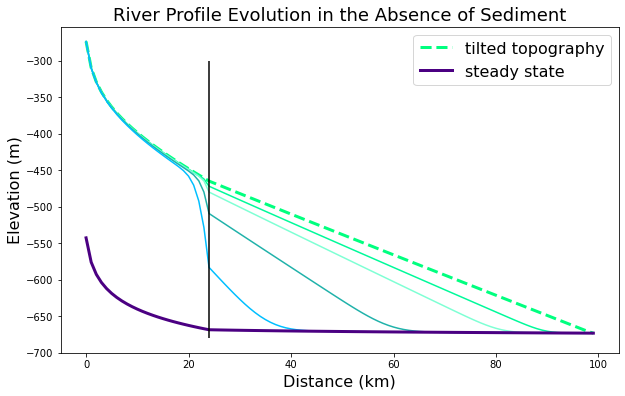

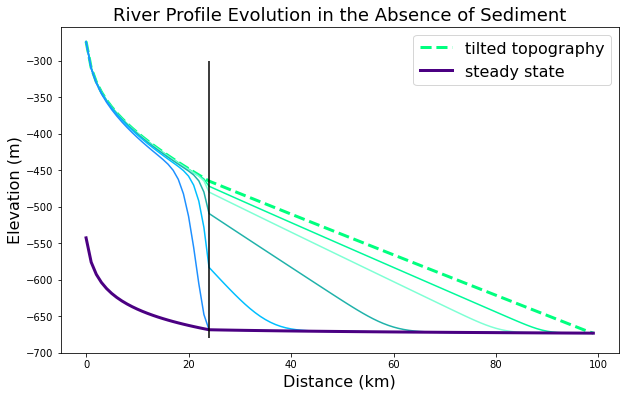

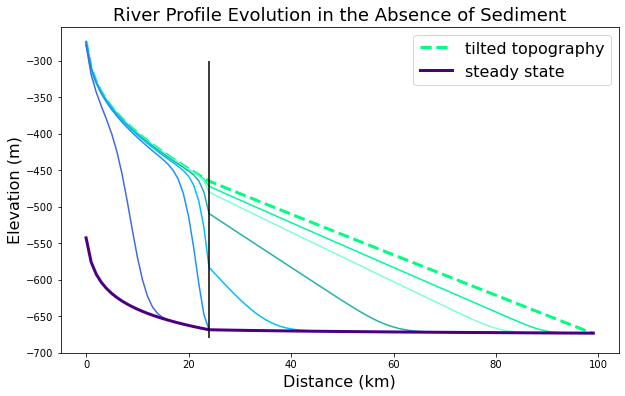

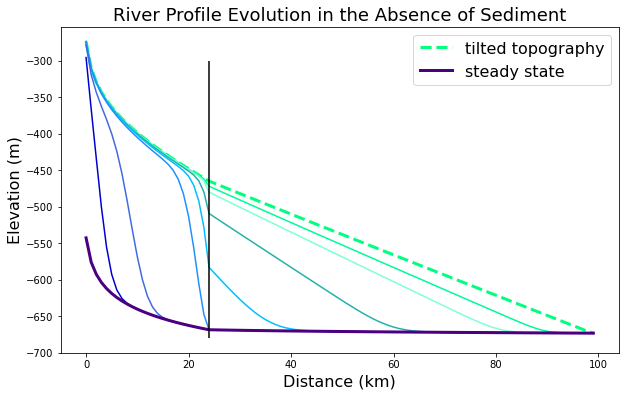

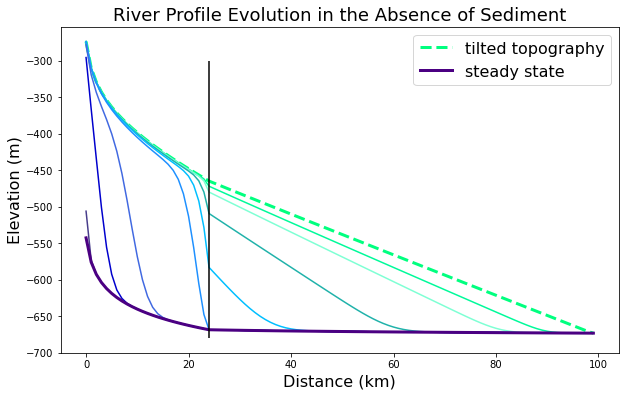

In [130]:
plt.figure(figsize = (10, 6))
plt.plot(x_1/1000, topography_SP_tilt_1_copy + difference_1, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
plt.plot(x_1/1000, topography_SP_tilt_50_copy + difference_50, color = 'mediumspringgreen')
plt.plot(x_1/1000, topography_SP_copy, color = 'indigo', label = 'steady state', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution in the Absence of Sediment', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -680, ymax = -300, color = 'k')
plt.savefig('hydrosymposium figs/sp_tilt_evolution/2.png')

plt.figure(figsize = (10, 6))
plt.plot(x_1/1000, topography_SP_tilt_1_copy + difference_1, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
plt.plot(x_1/1000, topography_SP_tilt_50_copy + difference_50, color = 'mediumspringgreen')
plt.plot(x_1/1000, topography_SP_tilt_100_copy + difference_100, color = 'aquamarine')
plt.plot(x_1/1000, topography_SP_copy, color = 'indigo', label = 'steady state', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution in the Absence of Sediment', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -680, ymax = -300, color = 'k')
plt.savefig('hydrosymposium figs/sp_tilt_evolution/3.png')

plt.figure(figsize = (10, 6))
plt.plot(x_1/1000, topography_SP_tilt_1_copy + difference_1, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
plt.plot(x_1/1000, topography_SP_tilt_50_copy + difference_50, color = 'mediumspringgreen')
plt.plot(x_1/1000, topography_SP_tilt_100_copy + difference_100, color = 'aquamarine')
plt.plot(x_1/1000, topography_SP_tilt_250_copy + difference_250, color = 'lightseagreen')
plt.plot(x_1/1000, topography_SP_copy, color = 'indigo', label = 'steady state', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution in the Absence of Sediment', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -680, ymax = -300, color = 'k')
plt.savefig('hydrosymposium figs/sp_tilt_evolution/4.png')

plt.figure(figsize = (10, 6))
plt.plot(x_1/1000, topography_SP_tilt_1_copy + difference_1, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
plt.plot(x_1/1000, topography_SP_tilt_50_copy + difference_50, color = 'mediumspringgreen')
plt.plot(x_1/1000, topography_SP_tilt_100_copy + difference_100, color = 'aquamarine')
plt.plot(x_1/1000, topography_SP_tilt_250_copy + difference_250, color = 'lightseagreen')
plt.plot(x_1/1000, topography_SP_tilt_500_copy + difference_500, color = 'deepskyblue')
plt.plot(x_1/1000, topography_SP_copy, color = 'indigo', label = 'steady state', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution in the Absence of Sediment', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -680, ymax = -300, color = 'k')
plt.savefig('hydrosymposium figs/sp_tilt_evolution/5.png')

plt.figure(figsize = (10, 6))
plt.plot(x_1/1000, topography_SP_tilt_1_copy + difference_1, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
plt.plot(x_1/1000, topography_SP_tilt_50_copy + difference_50, color = 'mediumspringgreen')
plt.plot(x_1/1000, topography_SP_tilt_100_copy + difference_100, color = 'aquamarine')
plt.plot(x_1/1000, topography_SP_tilt_250_copy + difference_250, color = 'lightseagreen')
plt.plot(x_1/1000, topography_SP_tilt_500_copy + difference_500, color = 'deepskyblue')
plt.plot(x_1/1000, topography_SP_tilt_1000_copy + difference_1000, color = 'dodgerblue')
plt.plot(x_1/1000, topography_SP_copy, color = 'indigo', label = 'steady state', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution in the Absence of Sediment', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -680, ymax = -300, color = 'k')
plt.savefig('hydrosymposium figs/sp_tilt_evolution/6.png')

plt.figure(figsize = (10, 6))
plt.plot(x_1/1000, topography_SP_tilt_1_copy + difference_1, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
plt.plot(x_1/1000, topography_SP_tilt_50_copy + difference_50, color = 'mediumspringgreen')
plt.plot(x_1/1000, topography_SP_tilt_100_copy + difference_100, color = 'aquamarine')
plt.plot(x_1/1000, topography_SP_tilt_250_copy + difference_250, color = 'lightseagreen')
plt.plot(x_1/1000, topography_SP_tilt_500_copy + difference_500, color = 'deepskyblue')
plt.plot(x_1/1000, topography_SP_tilt_1000_copy + difference_1000, color = 'dodgerblue')
plt.plot(x_1/1000, topography_SP_tilt_5000_copy + difference_5000, color = 'royalblue')
plt.plot(x_1/1000, topography_SP_copy, color = 'indigo', label = 'steady state', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution in the Absence of Sediment', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -680, ymax = -300, color = 'k')
plt.savefig('hydrosymposium figs/sp_tilt_evolution/7.png')

plt.figure(figsize = (10, 6))
plt.plot(x_1/1000, topography_SP_tilt_1_copy + difference_1, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
plt.plot(x_1/1000, topography_SP_tilt_50_copy + difference_50, color = 'mediumspringgreen')
plt.plot(x_1/1000, topography_SP_tilt_100_copy + difference_100, color = 'aquamarine')
plt.plot(x_1/1000, topography_SP_tilt_250_copy + difference_250, color = 'lightseagreen')
plt.plot(x_1/1000, topography_SP_tilt_500_copy + difference_500, color = 'deepskyblue')
plt.plot(x_1/1000, topography_SP_tilt_1000_copy + difference_1000, color = 'dodgerblue')
plt.plot(x_1/1000, topography_SP_tilt_5000_copy + difference_5000, color = 'royalblue')
plt.plot(x_1/1000, topography_SP_tilt_10000_copy + difference_10000, color = 'mediumblue')
plt.plot(x_1/1000, topography_SP_copy, color = 'indigo', label = 'steady state', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution in the Absence of Sediment', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -680, ymax = -300, color = 'k')
plt.savefig('hydrosymposium figs/sp_tilt_evolution/8.png')

plt.figure(figsize = (10, 6))
plt.plot(x_1/1000, topography_SP_tilt_1_copy + difference_1, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
plt.plot(x_1/1000, topography_SP_tilt_50_copy + difference_50, color = 'mediumspringgreen')
plt.plot(x_1/1000, topography_SP_tilt_100_copy + difference_100, color = 'aquamarine')
plt.plot(x_1/1000, topography_SP_tilt_250_copy + difference_250, color = 'lightseagreen')
plt.plot(x_1/1000, topography_SP_tilt_500_copy + difference_500, color = 'deepskyblue')
plt.plot(x_1/1000, topography_SP_tilt_1000_copy + difference_1000, color = 'dodgerblue')
plt.plot(x_1/1000, topography_SP_tilt_5000_copy + difference_5000, color = 'royalblue')
plt.plot(x_1/1000, topography_SP_tilt_10000_copy + difference_10000, color = 'mediumblue')
plt.plot(x_1/1000, topography_SP_tilt_25000_copy + difference_25000, color = 'darkslateblue')
plt.plot(x_1/1000, topography_SP_copy, color = 'indigo', label = 'steady state', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution in the Absence of Sediment', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -680, ymax = -300, color = 'k')
plt.savefig('hydrosymposium figs/sp_tilt_evolution/9.png')

In [33]:
# alright, now run the two lithology model to steady state

In [34]:
# use code from GSA notebook for tilting scenario because that worked
# (basically the same as before, just write q outside)

# SET UP GRID ARRAYS
dx_2 = 1000
x_2 = np.arange(0, 100000, dx_2)

# set up runoff rate
# r_2 = np.zeros(len(x_2))
# r_2[:] = 0.3
r_mtn_2 = 0.3
r_pln_2 = 0.3
r_2 = 0.3
q_2 = x_2 * r_2

# set up references to topography
Hstar_2 = 0.1
H_2 = Hstar_2 + np.zeros(len(x_2))
etab_2 = -H_2
eta_2 = etab_2 + H_2

# abrasion coefficients from Attal and Lave 2006 in % per km
beta_ig_2 = np.zeros(len(x_2))
beta_ig_2[:25] = 0.00004
beta_sed_2 = np.zeros(len(x_2))
beta_sed_2[25:] = 0.00014
atr_factor_2 = 0.00004

# erodibility values
k_ig_2 = np.zeros(len(x_2))
k_ig_2[:25] = 0.0001
k_sed_2 = np.zeros(len(x_2))
k_sed_2[25:] = 0.001

In [35]:
# write a function that has two bedrock lithologies in the domain, but only one contributing sediment to bedload
def two_lith_one_sed(x,
                     dx,
                     q,
                     Hstar,
                     H,
                     etab,
                     eta,
                     beta_ig,
                     beta_sed,
                     k_ig,
                     k_sed,
                     c = 1,
                     baselevel_rate = 0.001,
                     num_steps = 600000, 
                     porosity = 0.55):
    
    H[-1] = 0.0
    bedrock_ero_rate = np.zeros(len(x))  # bedrock erosion rate
    sedimentation_rate = np.zeros(len(x))
    total_ero_rate = np.zeros(len(x))
    qs = np.zeros(len(x))  # first node is left edge of 0th cell
    dt = 0.5 * (0.2 * dx * dx / (c*q[-1])) # time-step size

    for i in range(num_steps):
        
        # lower baselevel
        eta[-1] -= baselevel_rate * dt 
        
        # set boundary conditions
        etab[-1] = eta[-1]
        
        # calc slope
        S = -np.diff(eta)/dx
        # S = 0.001
        
        # calculate e factor
        efac = np.exp(- H / Hstar)
        
        # calculate total bedload sed flux and set boundary condition
        qs[1:] = c * q[1:] * S * (1.0 - efac[:-1])
        qs[0] = 0
        
        # calc bedrock erosion from stream power (plucking)
        ero_plucking_ig = efac[:-1] * (k_ig[1:] * q[1:] * S)
        ero_plucking_sed = efac[:-1] * (k_sed[1:] * q[1:] * S)
        
        # calc bedrock erosion from abrasion
        ero_ab_ig = efac[:-1] * (beta_ig[:-1] * qs[:-1])
        ero_ab_sed = efac[:-1] * (beta_sed[:-1] * qs[:-1])
        
        # calc bedrock erosion rate from stream power and abrasion
        bedrock_ero_rate[:-1] = ero_plucking_ig + ero_plucking_sed + ero_ab_ig + ero_ab_sed
        
        # calc change in bedrock elev
        etab[:-1] -= bedrock_ero_rate[:-1] * dt
        
        # calc grain attrition
        atr = 0.000004 * qs[1:]
        
        # calc change in alluvial thickness
        sedimentation_rate[:-1] = -((1 / porosity) * ((np.diff(qs)/dx) + atr - ero_plucking_ig))
        H[:-1] += sedimentation_rate[:-1] * dt
        H[H < 0] = 0
        
        # track total erosion
        total_ero_rate = bedrock_ero_rate - sedimentation_rate
        
        # update elev
        eta[:-1] = etab[:-1] + H[:-1]
        
    return (eta, etab, S, efac, qs, ero_plucking_ig, ero_plucking_sed, ero_ab_ig, ero_ab_sed, bedrock_ero_rate, 
            atr, sedimentation_rate, H, total_ero_rate)

In [36]:
# now see if this gets it to ss
TL_ss = [x_2, dx_2, q_2, Hstar_2, H_2, etab_2, eta_2, beta_ig_2, beta_sed_2, k_ig_2, k_sed_2]

(eta_TL, 
etab_TL,
S_TL,
efac_TL,
qs_TL,
ero_plucking_ig_TL, 
ero_plucking_sed_TL,
ero_ab_ig_TL,
ero_ab_sed_TL,
bedrock_ero_rate_TL, 
atr_TL, 
sedimentation_rate_TL, 
H_TL, 
total_ero_rate_TL) = two_lith_one_sed(*TL_ss)

In [37]:
print(total_ero_rate_TL)

[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.   ]


In [38]:
# cool
# now apply tilt

upstream_tilt_factor = np.linspace(270, 1, 100)

tilted_eta_TL = eta_TL + upstream_tilt_factor
tilted_etab_TL = etab_TL + upstream_tilt_factor

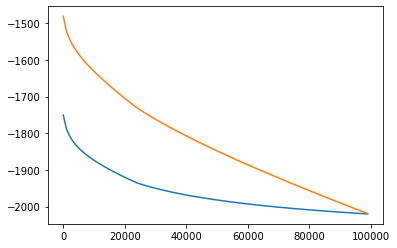

In [39]:
# make sure it looks okay
plt.plot(x_2, eta_TL)
plt.plot(x_2, tilted_eta_TL)
plt.show()

In [40]:
# neato, looks good
# now make copies of stuff
eta_TL_copy = eta_TL.copy()
etab_TL_copy = etab_TL.copy()
S_TL_copy = S_TL.copy()
efac_TL_copy = efac_TL.copy()
qs_TL_copy = qs_TL.copy()
ero_plucking_ig_TL_copy = ero_plucking_ig_TL.copy()
ero_plucking_sed_TL_copy = ero_plucking_sed_TL.copy()
ero_ab_ig_TL_copy = ero_ab_ig_TL.copy()
ero_ab_sed_TL_copy = ero_ab_sed_TL.copy()
bedrock_ero_rate_TL_copy = bedrock_ero_rate_TL.copy()
atr_TL_copy = atr_TL.copy()
sedimentation_rate_TL_copy = sedimentation_rate_TL.copy()
H_TL_copy = H_TL.copy()
total_ero_rate_TL_copy = total_ero_rate_TL.copy()

In [41]:
# also make copies of the input topo (tilted topo) for your time slices
tilted_eta_TL_copy = tilted_eta_TL.copy()
tilted_etab_TL_copy = tilted_etab_TL.copy()

tilted_eta_6 = tilted_eta_TL.copy()
tilted_etab_6 = tilted_etab_TL.copy()

tilted_eta_30 = tilted_eta_TL.copy()
tilted_etab_30 = tilted_etab_TL.copy()

tilted_eta_60 = tilted_eta_TL.copy()
tilted_etab_60 = tilted_etab_TL.copy()

tilted_eta_150 = tilted_eta_TL.copy()
tilted_etab_150 = tilted_etab_TL.copy()

tilted_eta_300 = tilted_eta_TL.copy()
tilted_etab_300 = tilted_etab_TL.copy()

tilted_eta_600 = tilted_eta_TL.copy()
tilted_etab_600 = tilted_etab_TL.copy()

tilted_eta_1500 = tilted_eta_TL.copy()
tilted_etab_1500 = tilted_etab_TL.copy()

tilted_eta_3000 = tilted_eta_TL.copy()
tilted_etab_3000 = tilted_etab_TL.copy()

tilted_eta_6000 = tilted_eta_TL.copy()
tilted_etab_6000 = tilted_etab_TL.copy()

tilted_eta_30000 = tilted_eta_TL.copy()
tilted_etab_30000 = tilted_etab_TL.copy()

tilted_eta_60000 = tilted_eta_TL.copy()
tilted_etab_60000 = tilted_etab_TL.copy()

tilted_eta_150000 = tilted_eta_TL.copy()
tilted_etab_150000 = tilted_etab_TL.copy()

tilted_eta_300000 = tilted_eta_TL.copy()
tilted_etab_300000 = tilted_etab_TL.copy()

In [42]:
# now rerun model back to steady state with tilted topo as an input

# create an input experiment
TL_ss_tilted = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_TL_copy, tilted_eta_TL_copy, beta_ig_2, beta_sed_2, k_ig_2, k_sed_2]

# run experiment and catch outputs!
(tilted_eta_TL_ss, 
tilted_etab_TL_ss,
tilted_S_TL_ss,
tilted_efac_TL_ss,
tilted_qs_TL_ss,
tilted_ero_plucking_ig_TL_ss, 
tilted_ero_plucking_sed_TL_ss,
tilted_ero_ab_ig_TL_ss,
tilted_ero_ab_sed_TL_ss,
tilted_bedrock_ero_rate_TL_ss, 
tilted_atr_TL_ss, 
tilted_sedimentation_rate_TL_ss, 
tilted_H_TL_ss, 
tilted_total_ero_rate_TL_ss) = two_lith_one_sed(*TL_ss_tilted)

In [43]:
# check for ss condition
print(tilted_total_ero_rate_TL_ss)

[0.00100001 0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001  

In [44]:
# hot diggity dog! amazing!

In [45]:
# now design the rest of the experiments
# design input experiments
tl_tilted_6 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_6, tilted_eta_6, 
               beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 6]

tl_tilted_30 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_30, tilted_eta_30, 
                beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 30]

tl_tilted_60 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_60, tilted_eta_60, 
                beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 60]

tl_tilted_150 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_150, tilted_eta_150, 
                 beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 150]

tl_tilted_300 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_300, tilted_eta_300, 
                 beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 300]

tl_tilted_600 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_600, tilted_eta_600, 
                 beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 600]

tl_tilted_1500 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_1500, tilted_eta_1500, 
                  beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 1500]

tl_tilted_3000 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_3000, tilted_eta_3000, 
                  beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 3000]

tl_tilted_6000 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_6000, tilted_eta_6000, 
                  beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 6000]

tl_tilted_30000 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_30000, tilted_eta_30000, 
                   beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 30000]

tl_tilted_60000 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_60000, tilted_eta_60000, 
                   beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 60000]

tl_tilted_150000 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_150000, tilted_eta_150000, 
                    beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 150000]

tl_tilted_300000 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_300000, tilted_eta_300000, 
                    beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 300000]



In [46]:
# so now we want to run all of the intermediate steps, making copies after each
(tilted_eta_TL_6, 
tilted_etab_TL_6,
tilted_S_TL_6,
tilted_efac_TL_6,
tilted_qs_TL_6,
tilted_ero_plucking_ig_TL_6, 
tilted_ero_plucking_sed_TL_6,
tilted_ero_ab_ig_TL_6,
tilted_ero_ab_sed_TL_6,
tilted_bedrock_ero_rate_TL_6, 
tilted_atr_TL_6, 
tilted_sedimentation_rate_TL_6, 
tilted_H_TL_6, 
tilted_total_ero_rate_TL_6) = two_lith_one_sed(*tl_tilted_6)

tilted_eta_TL_6_copy = tilted_eta_TL_6.copy()
tilted_etab_TL_6_copy = tilted_etab_TL_6.copy()
tilted_S_TL_6_copy = tilted_S_TL_6.copy()
tilted_efac_TL_6_copy = tilted_efac_TL_6.copy()
tilted_qs_TL_6_copy = tilted_qs_TL_6.copy()
tilted_ero_plucking_ig_TL_6_copy = tilted_ero_plucking_ig_TL_6.copy()
tilted_ero_plucking_sed_TL_6_copy = tilted_ero_plucking_sed_TL_6.copy()
tilted_ero_ab_ig_TL_6_copy = tilted_ero_ab_ig_TL_6.copy()
tilted_ero_ab_sed_TL_6_copy = tilted_ero_ab_sed_TL_6.copy()
tilted_bedrock_ero_rate_TL_6_copy = tilted_bedrock_ero_rate_TL_6.copy()
tilted_atr_TL_6_copy = tilted_atr_TL_6.copy()
tilted_sedimentation_rate_TL_6_copy = tilted_sedimentation_rate_TL_6.copy()
tilted_H_TL_6_copy = tilted_H_TL_6.copy()
tilted_total_ero_rate_TL_6_copy = tilted_total_ero_rate_TL_6.copy()

In [47]:
(tilted_eta_TL_30, 
tilted_etab_TL_30,
tilted_S_TL_30,
tilted_efac_TL_30,
tilted_qs_TL_30,
tilted_ero_plucking_ig_TL_30, 
tilted_ero_plucking_sed_TL_30,
tilted_ero_ab_ig_TL_30,
tilted_ero_ab_sed_TL_30,
tilted_bedrock_ero_rate_TL_30, 
tilted_atr_TL_30, 
tilted_sedimentation_rate_TL_30, 
tilted_H_TL_30, 
tilted_total_ero_rate_TL_30) = two_lith_one_sed(*tl_tilted_30)

tilted_eta_TL_30_copy = tilted_eta_TL_30.copy()
tilted_etab_TL_30_copy = tilted_etab_TL_30.copy()
tilted_S_TL_30_copy = tilted_S_TL_30.copy()
tilted_efac_TL_30_copy = tilted_efac_TL_30.copy()
tilted_qs_TL_30_copy = tilted_qs_TL_30.copy()
tilted_ero_plucking_ig_TL_30_copy = tilted_ero_plucking_ig_TL_30.copy()
tilted_ero_plucking_sed_TL_30_copy = tilted_ero_plucking_sed_TL_30.copy()
tilted_ero_ab_ig_TL_30_copy = tilted_ero_ab_ig_TL_30.copy()
tilted_ero_ab_sed_TL_30_copy = tilted_ero_ab_sed_TL_30.copy()
tilted_bedrock_ero_rate_TL_30_copy = tilted_bedrock_ero_rate_TL_30.copy()
tilted_atr_TL_30_copy = tilted_atr_TL_30.copy()
tilted_sedimentation_rate_TL_30_copy = tilted_sedimentation_rate_TL_30.copy()
tilted_H_TL_30_copy = tilted_H_TL_30.copy()
tilted_total_ero_rate_TL_30_copy = tilted_total_ero_rate_TL_30.copy()

In [48]:
(tilted_eta_TL_60, 
tilted_etab_TL_60,
tilted_S_TL_60,
tilted_efac_TL_60,
tilted_qs_TL_60,
tilted_ero_plucking_ig_TL_60, 
tilted_ero_plucking_sed_TL_60,
tilted_ero_ab_ig_TL_60,
tilted_ero_ab_sed_TL_60,
tilted_bedrock_ero_rate_TL_60, 
tilted_atr_TL_60, 
tilted_sedimentation_rate_TL_60, 
tilted_H_TL_60, 
tilted_total_ero_rate_TL_60) = two_lith_one_sed(*tl_tilted_60)

tilted_eta_TL_60_copy = tilted_eta_TL_60.copy()
tilted_etab_TL_60_copy = tilted_etab_TL_60.copy()
tilted_S_TL_60_copy = tilted_S_TL_60.copy()
tilted_efac_TL_60_copy = tilted_efac_TL_60.copy()
tilted_qs_TL_60_copy = tilted_qs_TL_60.copy()
tilted_ero_plucking_ig_TL_60_copy = tilted_ero_plucking_ig_TL_60.copy()
tilted_ero_plucking_sed_TL_60_copy = tilted_ero_plucking_sed_TL_60.copy()
tilted_ero_ab_ig_TL_60_copy = tilted_ero_ab_ig_TL_60.copy()
tilted_ero_ab_sed_TL_60_copy = tilted_ero_ab_sed_TL_60.copy()
tilted_bedrock_ero_rate_TL_60_copy = tilted_bedrock_ero_rate_TL_60.copy()
tilted_atr_TL_60_copy = tilted_atr_TL_60.copy()
tilted_sedimentation_rate_TL_60_copy = tilted_sedimentation_rate_TL_60.copy()
tilted_H_TL_60_copy = tilted_H_TL_60.copy()
tilted_total_ero_rate_TL_60_copy = tilted_total_ero_rate_TL_60.copy()

In [49]:
(tilted_eta_TL_150, 
tilted_etab_TL_150,
tilted_S_TL_150,
tilted_efac_TL_150,
tilted_qs_TL_150,
tilted_ero_plucking_ig_TL_150, 
tilted_ero_plucking_sed_TL_150,
tilted_ero_ab_ig_TL_150,
tilted_ero_ab_sed_TL_150,
tilted_bedrock_ero_rate_TL_150, 
tilted_atr_TL_150, 
tilted_sedimentation_rate_TL_150, 
tilted_H_TL_150, 
tilted_total_ero_rate_TL_150) = two_lith_one_sed(*tl_tilted_150)

tilted_eta_TL_150_copy = tilted_eta_TL_150.copy()
tilted_etab_TL_150_copy = tilted_etab_TL_150.copy()
tilted_S_TL_150_copy = tilted_S_TL_150.copy()
tilted_efac_TL_150_copy = tilted_efac_TL_150.copy()
tilted_qs_TL_150_copy = tilted_qs_TL_150.copy()
tilted_ero_plucking_ig_TL_150_copy = tilted_ero_plucking_ig_TL_150.copy()
tilted_ero_plucking_sed_TL_150_copy = tilted_ero_plucking_sed_TL_150.copy()
tilted_ero_ab_ig_TL_150_copy = tilted_ero_ab_ig_TL_150.copy()
tilted_ero_ab_sed_TL_150_copy = tilted_ero_ab_sed_TL_150.copy()
tilted_bedrock_ero_rate_TL_150_copy = tilted_bedrock_ero_rate_TL_150.copy()
tilted_atr_TL_150_copy = tilted_atr_TL_150.copy()
tilted_sedimentation_rate_TL_150_copy = tilted_sedimentation_rate_TL_150.copy()
tilted_H_TL_150_copy = tilted_H_TL_150.copy()
tilted_total_ero_rate_TL_150_copy = tilted_total_ero_rate_TL_150.copy()

In [50]:
(tilted_eta_TL_300, 
tilted_etab_TL_300,
tilted_S_TL_300,
tilted_efac_TL_300,
tilted_qs_TL_300,
tilted_ero_plucking_ig_TL_300, 
tilted_ero_plucking_sed_TL_300,
tilted_ero_ab_ig_TL_300,
tilted_ero_ab_sed_TL_300,
tilted_bedrock_ero_rate_TL_300, 
tilted_atr_TL_300, 
tilted_sedimentation_rate_TL_300, 
tilted_H_TL_300, 
tilted_total_ero_rate_TL_300) = two_lith_one_sed(*tl_tilted_300)

tilted_eta_TL_300_copy = tilted_eta_TL_300.copy()
tilted_etab_TL_300_copy = tilted_etab_TL_300.copy()
tilted_S_TL_300_copy = tilted_S_TL_300.copy()
tilted_efac_TL_300_copy = tilted_efac_TL_300.copy()
tilted_qs_TL_300_copy = tilted_qs_TL_300.copy()
tilted_ero_plucking_ig_TL_300_copy = tilted_ero_plucking_ig_TL_300.copy()
tilted_ero_plucking_sed_TL_300_copy = tilted_ero_plucking_sed_TL_300.copy()
tilted_ero_ab_ig_TL_300_copy = tilted_ero_ab_ig_TL_300.copy()
tilted_ero_ab_sed_TL_300_copy = tilted_ero_ab_sed_TL_300.copy()
tilted_bedrock_ero_rate_TL_300_copy = tilted_bedrock_ero_rate_TL_300.copy()
tilted_atr_TL_300_copy = tilted_atr_TL_300.copy()
tilted_sedimentation_rate_TL_300_copy = tilted_sedimentation_rate_TL_300.copy()
tilted_H_TL_300_copy = tilted_H_TL_300.copy()
tilted_total_ero_rate_TL_300_copy = tilted_total_ero_rate_TL_300.copy()

In [51]:
(tilted_eta_TL_600, 
tilted_etab_TL_600,
tilted_S_TL_600,
tilted_efac_TL_600,
tilted_qs_TL_600,
tilted_ero_plucking_ig_TL_600, 
tilted_ero_plucking_sed_TL_600,
tilted_ero_ab_ig_TL_600,
tilted_ero_ab_sed_TL_600,
tilted_bedrock_ero_rate_TL_600, 
tilted_atr_TL_600, 
tilted_sedimentation_rate_TL_600, 
tilted_H_TL_600, 
tilted_total_ero_rate_TL_600) = two_lith_one_sed(*tl_tilted_600)

tilted_eta_TL_600_copy = tilted_eta_TL_600.copy()
tilted_etab_TL_600_copy = tilted_etab_TL_600.copy()
tilted_S_TL_600_copy = tilted_S_TL_600.copy()
tilted_efac_TL_600_copy = tilted_efac_TL_600.copy()
tilted_qs_TL_600_copy = tilted_qs_TL_600.copy()
tilted_ero_plucking_ig_TL_600_copy = tilted_ero_plucking_ig_TL_600.copy()
tilted_ero_plucking_sed_TL_600_copy = tilted_ero_plucking_sed_TL_600.copy()
tilted_ero_ab_ig_TL_600_copy = tilted_ero_ab_ig_TL_600.copy()
tilted_ero_ab_sed_TL_600_copy = tilted_ero_ab_sed_TL_600.copy()
tilted_bedrock_ero_rate_TL_600_copy = tilted_bedrock_ero_rate_TL_600.copy()
tilted_atr_TL_600_copy = tilted_atr_TL_600.copy()
tilted_sedimentation_rate_TL_600_copy = tilted_sedimentation_rate_TL_600.copy()
tilted_H_TL_600_copy = tilted_H_TL_600.copy()
tilted_total_ero_rate_TL_600_copy = tilted_total_ero_rate_TL_600.copy()

In [52]:
(tilted_eta_TL_1500, 
tilted_etab_TL_1500,
tilted_S_TL_1500,
tilted_efac_TL_1500,
tilted_qs_TL_1500,
tilted_ero_plucking_ig_TL_1500, 
tilted_ero_plucking_sed_TL_1500,
tilted_ero_ab_ig_TL_1500,
tilted_ero_ab_sed_TL_1500,
tilted_bedrock_ero_rate_TL_1500, 
tilted_atr_TL_1500, 
tilted_sedimentation_rate_TL_1500, 
tilted_H_TL_1500, 
tilted_total_ero_rate_TL_1500) = two_lith_one_sed(*tl_tilted_1500)

tilted_eta_TL_1500_copy = tilted_eta_TL_1500.copy()
tilted_etab_TL_1500_copy = tilted_etab_TL_1500.copy()
tilted_S_TL_1500_copy = tilted_S_TL_1500.copy()
tilted_efac_TL_1500_copy = tilted_efac_TL_1500.copy()
tilted_qs_TL_1500_copy = tilted_qs_TL_1500.copy()
tilted_ero_plucking_ig_TL_1500_copy = tilted_ero_plucking_ig_TL_1500.copy()
tilted_ero_plucking_sed_TL_1500_copy = tilted_ero_plucking_sed_TL_1500.copy()
tilted_ero_ab_ig_TL_1500_copy = tilted_ero_ab_ig_TL_1500.copy()
tilted_ero_ab_sed_TL_1500_copy = tilted_ero_ab_sed_TL_1500.copy()
tilted_bedrock_ero_rate_TL_1500_copy = tilted_bedrock_ero_rate_TL_1500.copy()
tilted_atr_TL_1500_copy = tilted_atr_TL_1500.copy()
tilted_sedimentation_rate_TL_1500_copy = tilted_sedimentation_rate_TL_1500.copy()
tilted_H_TL_1500_copy = tilted_H_TL_1500.copy()
tilted_total_ero_rate_TL_1500_copy = tilted_total_ero_rate_TL_1500.copy()

In [53]:
(tilted_eta_TL_3000, 
tilted_etab_TL_3000,
tilted_S_TL_3000,
tilted_efac_TL_3000,
tilted_qs_TL_3000,
tilted_ero_plucking_ig_TL_3000, 
tilted_ero_plucking_sed_TL_3000,
tilted_ero_ab_ig_TL_3000,
tilted_ero_ab_sed_TL_3000,
tilted_bedrock_ero_rate_TL_3000, 
tilted_atr_TL_3000, 
tilted_sedimentation_rate_TL_3000, 
tilted_H_TL_3000, 
tilted_total_ero_rate_TL_3000) = two_lith_one_sed(*tl_tilted_3000)

tilted_eta_TL_3000_copy = tilted_eta_TL_3000.copy()
tilted_etab_TL_3000_copy = tilted_etab_TL_3000.copy()
tilted_S_TL_3000_copy = tilted_S_TL_3000.copy()
tilted_efac_TL_3000_copy = tilted_efac_TL_3000.copy()
tilted_qs_TL_3000_copy = tilted_qs_TL_3000.copy()
tilted_ero_plucking_ig_TL_3000_copy = tilted_ero_plucking_ig_TL_3000.copy()
tilted_ero_plucking_sed_TL_3000_copy = tilted_ero_plucking_sed_TL_3000.copy()
tilted_ero_ab_ig_TL_3000_copy = tilted_ero_ab_ig_TL_3000.copy()
tilted_ero_ab_sed_TL_3000_copy = tilted_ero_ab_sed_TL_3000.copy()
tilted_bedrock_ero_rate_TL_3000_copy = tilted_bedrock_ero_rate_TL_3000.copy()
tilted_atr_TL_3000_copy = tilted_atr_TL_3000.copy()
tilted_sedimentation_rate_TL_3000_copy = tilted_sedimentation_rate_TL_3000.copy()
tilted_H_TL_3000_copy = tilted_H_TL_3000.copy()
tilted_total_ero_rate_TL_3000_copy = tilted_total_ero_rate_TL_3000.copy()

In [54]:
(tilted_eta_TL_6000, 
tilted_etab_TL_6000,
tilted_S_TL_6000,
tilted_efac_TL_6000,
tilted_qs_TL_6000,
tilted_ero_plucking_ig_TL_6000, 
tilted_ero_plucking_sed_TL_6000,
tilted_ero_ab_ig_TL_6000,
tilted_ero_ab_sed_TL_6000,
tilted_bedrock_ero_rate_TL_6000, 
tilted_atr_TL_6000, 
tilted_sedimentation_rate_TL_6000, 
tilted_H_TL_6000, 
tilted_total_ero_rate_TL_6000) = two_lith_one_sed(*tl_tilted_6000)

tilted_eta_TL_6000_copy = tilted_eta_TL_6000.copy()
tilted_etab_TL_6000_copy = tilted_etab_TL_6000.copy()
tilted_S_TL_6000_copy = tilted_S_TL_6000.copy()
tilted_efac_TL_6000_copy = tilted_efac_TL_6000.copy()
tilted_qs_TL_6000_copy = tilted_qs_TL_6000.copy()
tilted_ero_plucking_ig_TL_6000_copy = tilted_ero_plucking_ig_TL_6000.copy()
tilted_ero_plucking_sed_TL_6000_copy = tilted_ero_plucking_sed_TL_6000.copy()
tilted_ero_ab_ig_TL_6000_copy = tilted_ero_ab_ig_TL_6000.copy()
tilted_ero_ab_sed_TL_6000_copy = tilted_ero_ab_sed_TL_6000.copy()
tilted_bedrock_ero_rate_TL_6000_copy = tilted_bedrock_ero_rate_TL_6000.copy()
tilted_atr_TL_6000_copy = tilted_atr_TL_6000.copy()
tilted_sedimentation_rate_TL_6000_copy = tilted_sedimentation_rate_TL_6000.copy()
tilted_H_TL_6000_copy = tilted_H_TL_6000.copy()
tilted_total_ero_rate_TL_6000_copy = tilted_total_ero_rate_TL_6000.copy()

In [55]:
(tilted_eta_TL_30000, 
tilted_etab_TL_30000,
tilted_S_TL_30000,
tilted_efac_TL_30000,
tilted_qs_TL_30000,
tilted_ero_plucking_ig_TL_30000, 
tilted_ero_plucking_sed_TL_30000,
tilted_ero_ab_ig_TL_30000,
tilted_ero_ab_sed_TL_30000,
tilted_bedrock_ero_rate_TL_30000, 
tilted_atr_TL_30000, 
tilted_sedimentation_rate_TL_30000, 
tilted_H_TL_30000, 
tilted_total_ero_rate_TL_30000) = two_lith_one_sed(*tl_tilted_30000)

tilted_eta_TL_30000_copy = tilted_eta_TL_30000.copy()
tilted_etab_TL_30000_copy = tilted_etab_TL_30000.copy()
tilted_S_TL_30000_copy = tilted_S_TL_30000.copy()
tilted_efac_TL_30000_copy = tilted_efac_TL_30000.copy()
tilted_qs_TL_30000_copy = tilted_qs_TL_30000.copy()
tilted_ero_plucking_ig_TL_30000_copy = tilted_ero_plucking_ig_TL_30000.copy()
tilted_ero_plucking_sed_TL_30000_copy = tilted_ero_plucking_sed_TL_30000.copy()
tilted_ero_ab_ig_TL_30000_copy = tilted_ero_ab_ig_TL_30000.copy()
tilted_ero_ab_sed_TL_30000_copy = tilted_ero_ab_sed_TL_30000.copy()
tilted_bedrock_ero_rate_TL_30000_copy = tilted_bedrock_ero_rate_TL_30000.copy()
tilted_atr_TL_30000_copy = tilted_atr_TL_30000.copy()
tilted_sedimentation_rate_TL_30000_copy = tilted_sedimentation_rate_TL_30000.copy()
tilted_H_TL_30000_copy = tilted_H_TL_30000.copy()
tilted_total_ero_rate_TL_30000_copy = tilted_total_ero_rate_TL_30000.copy()

In [56]:
(tilted_eta_TL_60000, 
tilted_etab_TL_60000,
tilted_S_TL_60000,
tilted_efac_TL_60000,
tilted_qs_TL_60000,
tilted_ero_plucking_ig_TL_60000, 
tilted_ero_plucking_sed_TL_60000,
tilted_ero_ab_ig_TL_60000,
tilted_ero_ab_sed_TL_60000,
tilted_bedrock_ero_rate_TL_60000, 
tilted_atr_TL_60000, 
tilted_sedimentation_rate_TL_60000, 
tilted_H_TL_60000, 
tilted_total_ero_rate_TL_60000) = two_lith_one_sed(*tl_tilted_60000)

tilted_eta_TL_60000_copy = tilted_eta_TL_60000.copy()
tilted_etab_TL_60000_copy = tilted_etab_TL_60000.copy()
tilted_S_TL_60000_copy = tilted_S_TL_60000.copy()
tilted_efac_TL_60000_copy = tilted_efac_TL_60000.copy()
tilted_qs_TL_60000_copy = tilted_qs_TL_60000.copy()
tilted_ero_plucking_ig_TL_60000_copy = tilted_ero_plucking_ig_TL_60000.copy()
tilted_ero_plucking_sed_TL_60000_copy = tilted_ero_plucking_sed_TL_60000.copy()
tilted_ero_ab_ig_TL_60000_copy = tilted_ero_ab_ig_TL_60000.copy()
tilted_ero_ab_sed_TL_60000_copy = tilted_ero_ab_sed_TL_60000.copy()
tilted_bedrock_ero_rate_TL_60000_copy = tilted_bedrock_ero_rate_TL_60000.copy()
tilted_atr_TL_60000_copy = tilted_atr_TL_60000.copy()
tilted_sedimentation_rate_TL_60000_copy = tilted_sedimentation_rate_TL_60000.copy()
tilted_H_TL_60000_copy = tilted_H_TL_60000.copy()
tilted_total_ero_rate_TL_60000_copy = tilted_total_ero_rate_TL_60000.copy()

In [57]:
(tilted_eta_TL_150000, 
tilted_etab_TL_150000,
tilted_S_TL_150000,
tilted_efac_TL_150000,
tilted_qs_TL_150000,
tilted_ero_plucking_ig_TL_150000, 
tilted_ero_plucking_sed_TL_150000,
tilted_ero_ab_ig_TL_150000,
tilted_ero_ab_sed_TL_150000,
tilted_bedrock_ero_rate_TL_150000, 
tilted_atr_TL_150000, 
tilted_sedimentation_rate_TL_150000, 
tilted_H_TL_150000, 
tilted_total_ero_rate_TL_150000) = two_lith_one_sed(*tl_tilted_150000)

tilted_eta_TL_150000_copy = tilted_eta_TL_150000.copy()
tilted_etab_TL_150000_copy = tilted_etab_TL_150000.copy()
tilted_S_TL_150000_copy = tilted_S_TL_150000.copy()
tilted_efac_TL_150000_copy = tilted_efac_TL_150000.copy()
tilted_qs_TL_150000_copy = tilted_qs_TL_150000.copy()
tilted_ero_plucking_ig_TL_150000_copy = tilted_ero_plucking_ig_TL_150000.copy()
tilted_ero_plucking_sed_TL_150000_copy = tilted_ero_plucking_sed_TL_150000.copy()
tilted_ero_ab_ig_TL_150000_copy = tilted_ero_ab_ig_TL_150000.copy()
tilted_ero_ab_sed_TL_150000_copy = tilted_ero_ab_sed_TL_150000.copy()
tilted_bedrock_ero_rate_TL_150000_copy = tilted_bedrock_ero_rate_TL_150000.copy()
tilted_atr_TL_150000_copy = tilted_atr_TL_150000.copy()
tilted_sedimentation_rate_TL_150000_copy = tilted_sedimentation_rate_TL_150000.copy()
tilted_H_TL_150000_copy = tilted_H_TL_150000.copy()
tilted_total_ero_rate_TL_150000_copy = tilted_total_ero_rate_TL_150000.copy()

In [58]:
(tilted_eta_TL_300000, 
tilted_etab_TL_300000,
tilted_S_TL_300000,
tilted_efac_TL_300000,
tilted_qs_TL_300000,
tilted_ero_plucking_ig_TL_300000, 
tilted_ero_plucking_sed_TL_300000,
tilted_ero_ab_ig_TL_300000,
tilted_ero_ab_sed_TL_300000,
tilted_bedrock_ero_rate_TL_300000, 
tilted_atr_TL_300000, 
tilted_sedimentation_rate_TL_300000, 
tilted_H_TL_300000, 
tilted_total_ero_rate_TL_300000) = two_lith_one_sed(*tl_tilted_300000)

tilted_eta_TL_300000_copy = tilted_eta_TL_300000.copy()
tilted_etab_TL_300000_copy = tilted_etab_TL_300000.copy()
tilted_S_TL_300000_copy = tilted_S_TL_300000.copy()
tilted_efac_TL_300000_copy = tilted_efac_TL_300000.copy()
tilted_qs_TL_300000_copy = tilted_qs_TL_300000.copy()
tilted_ero_plucking_ig_TL_300000_copy = tilted_ero_plucking_ig_TL_300000.copy()
tilted_ero_plucking_sed_TL_300000_copy = tilted_ero_plucking_sed_TL_300000.copy()
tilted_ero_ab_ig_TL_300000_copy = tilted_ero_ab_ig_TL_300000.copy()
tilted_ero_ab_sed_TL_300000_copy = tilted_ero_ab_sed_TL_300000.copy()
tilted_bedrock_ero_rate_TL_300000_copy = tilted_bedrock_ero_rate_TL_300000.copy()
tilted_atr_TL_300000_copy = tilted_atr_TL_300000.copy()
tilted_sedimentation_rate_TL_300000_copy = tilted_sedimentation_rate_TL_300000.copy()
tilted_H_TL_300000_copy = tilted_H_TL_300000.copy()
tilted_total_ero_rate_TL_300000_copy = tilted_total_ero_rate_TL_300000.copy()

In [59]:
# and make adjustments for same outlet elevation

difference_6 = eta_TL[-1] - tilted_eta_TL_6_copy[-1]
difference_30 = eta_TL[-1] - tilted_eta_TL_30_copy[-1]
difference_60 = eta_TL[-1] - tilted_eta_TL_60_copy[-1]
difference_150 = eta_TL[-1] - tilted_eta_TL_150_copy[-1]
difference_300 = eta_TL[-1] - tilted_eta_TL_300_copy[-1]
difference_600 = eta_TL[-1] - tilted_eta_TL_600_copy[-1]
difference_1500 = eta_TL[-1] - tilted_eta_TL_1500_copy[-1]
difference_3000 = eta_TL[-1] - tilted_eta_TL_3000_copy[-1]
difference_6000 = eta_TL[-1] - tilted_eta_TL_6000_copy[-1]
difference_30000 = eta_TL[-1] - tilted_eta_TL_30000_copy[-1]
difference_60000 = eta_TL[-1] - tilted_eta_TL_60000_copy[-1]
difference_150000 = eta_TL[-1] - tilted_eta_TL_150000_copy[-1]
difference_300000 = eta_TL[-1] - tilted_eta_TL_300000_copy[-1]
tilted_diff = eta_TL[-1] - tilted_eta_TL_copy

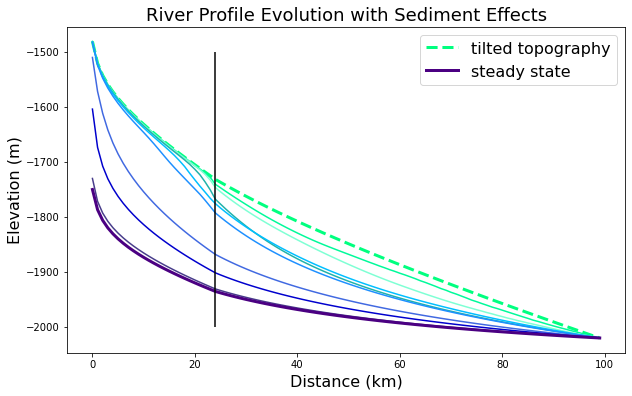

In [60]:
# moment of truth... see if we can make some plots
plt.figure(figsize = (10, 6))

plt.plot(x_2/1000, tilted_eta_TL_6_copy + difference_6, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_TL_30_copy + difference_30, label = '30')
# plt.plot(x_2/1000, tilted_eta_TL_60_copy + difference_60, label = '60')
# plt.plot(x_2/1000, tilted_eta_TL_150_copy + difference_150, label = '150')
plt.plot(x_2/1000, tilted_eta_TL_300_copy + difference_300, color = 'mediumspringgreen')
plt.plot(x_2/1000, tilted_eta_TL_600_copy + difference_600, color = 'aquamarine')
plt.plot(x_2/1000, tilted_eta_TL_1500_copy + difference_1500, color = 'lightseagreen')
plt.plot(x_2/1000, tilted_eta_TL_3000_copy + difference_3000, color = 'deepskyblue')
plt.plot(x_2/1000, tilted_eta_TL_6000_copy + difference_6000, color = 'dodgerblue')
plt.plot(x_2/1000, tilted_eta_TL_30000_copy + difference_30000, color = 'royalblue')
plt.plot(x_2/1000, tilted_eta_TL_60000_copy + difference_60000, color = 'mediumblue')
plt.plot(x_2/1000, tilted_eta_TL_150000_copy + difference_150000, color = 'darkslateblue')
# plt.plot(x_2/1000, tilted_eta_TL_300000_copy + difference_300000, label = '300000')
plt.plot(x_2/1000, eta_TL_copy, color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution with Sediment Effects', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -2000, ymax = -1500, color = 'k')
plt.show()

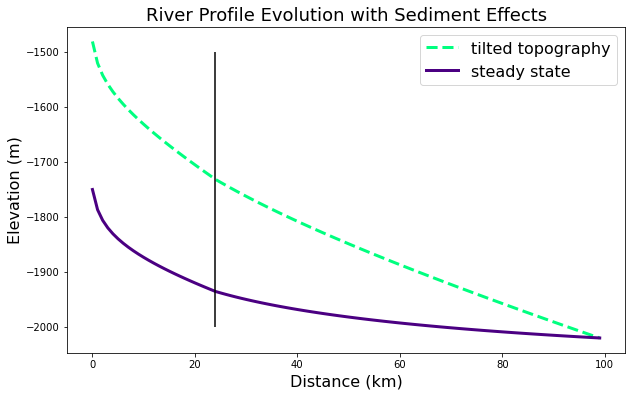

In [132]:
# now make pngs
plt.figure(figsize = (10, 6))
plt.plot(x_2/1000, tilted_eta_TL_6_copy + difference_6, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_TL_30_copy + difference_30, label = '30')
# plt.plot(x_2/1000, tilted_eta_TL_60_copy + difference_60, label = '60')
# plt.plot(x_2/1000, tilted_eta_TL_150_copy + difference_150, label = '150')
# plt.plot(x_2/1000, tilted_eta_TL_300_copy + difference_300, color = 'mediumspringgreen')
# plt.plot(x_2/1000, tilted_eta_TL_600_copy + difference_600, color = 'aquamarine')
# plt.plot(x_2/1000, tilted_eta_TL_1500_copy + difference_1500, color = 'lightseagreen')
# plt.plot(x_2/1000, tilted_eta_TL_3000_copy + difference_3000, color = 'deepskyblue')
# plt.plot(x_2/1000, tilted_eta_TL_6000_copy + difference_6000, color = 'dodgerblue')
# plt.plot(x_2/1000, tilted_eta_TL_30000_copy + difference_30000, color = 'royalblue')
# plt.plot(x_2/1000, tilted_eta_TL_60000_copy + difference_60000, color = 'mediumblue')
# plt.plot(x_2/1000, tilted_eta_TL_150000_copy + difference_150000, color = 'darkslateblue')
# plt.plot(x_2/1000, tilted_eta_TL_300000_copy + difference_300000, label = '300000')
plt.plot(x_2/1000, eta_TL_copy, color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution with Sediment Effects', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -2000, ymax = -1500, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_evolution/1.png')

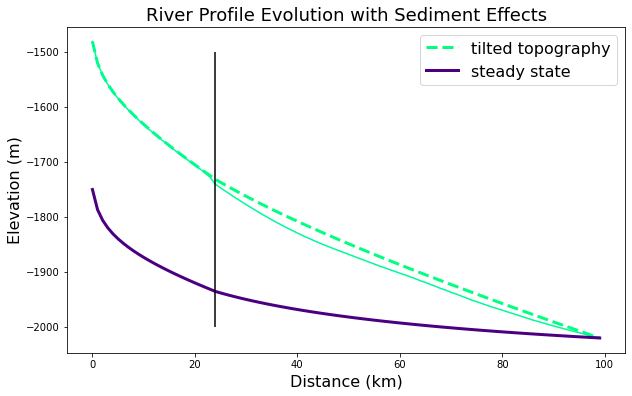

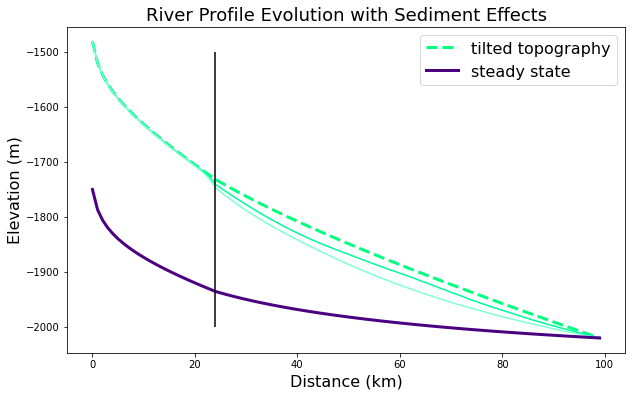

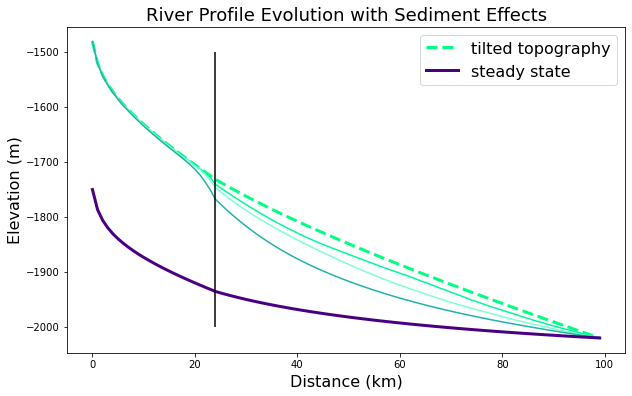

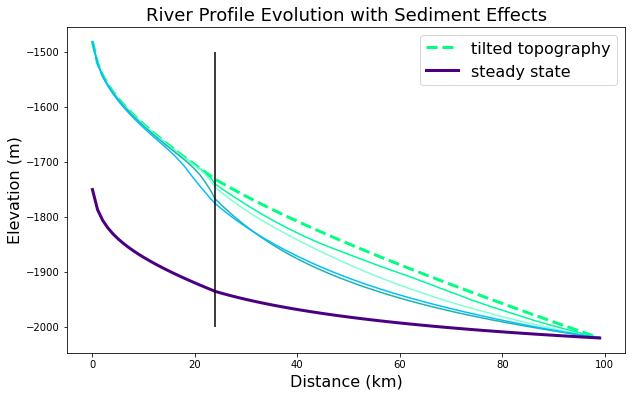

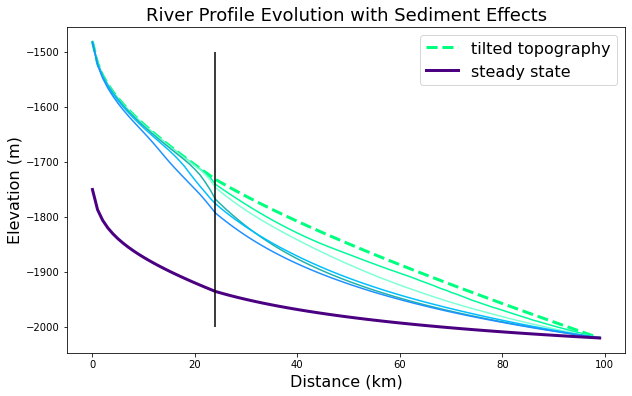

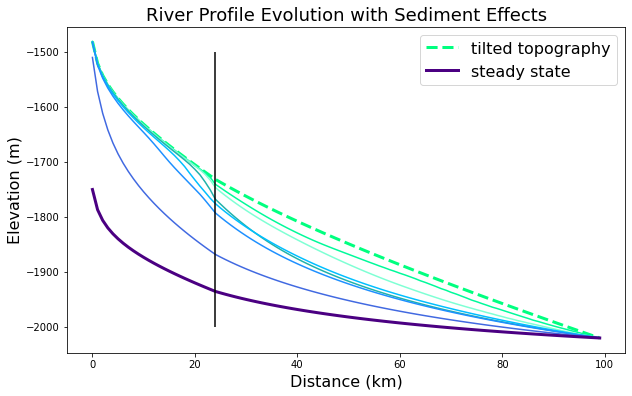

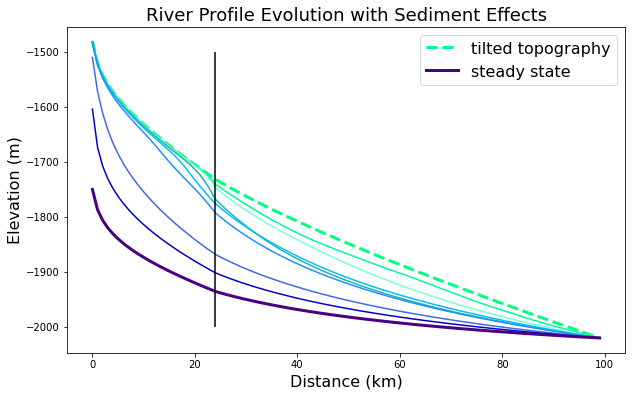

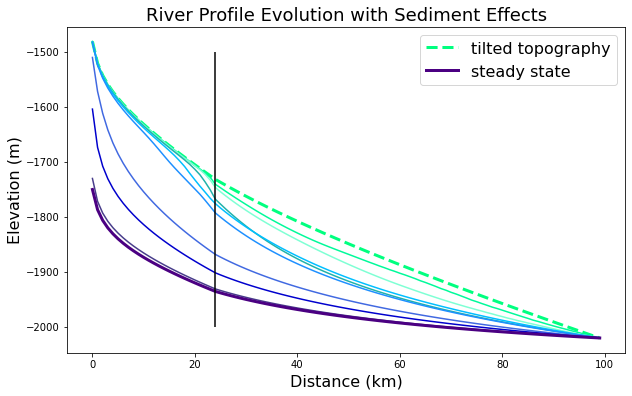

In [133]:
plt.figure(figsize = (10, 6))
plt.plot(x_2/1000, tilted_eta_TL_6_copy + difference_6, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_TL_30_copy + difference_30, label = '30')
# plt.plot(x_2/1000, tilted_eta_TL_60_copy + difference_60, label = '60')
# plt.plot(x_2/1000, tilted_eta_TL_150_copy + difference_150, label = '150')
plt.plot(x_2/1000, tilted_eta_TL_300_copy + difference_300, color = 'mediumspringgreen')
# plt.plot(x_2/1000, tilted_eta_TL_600_copy + difference_600, color = 'aquamarine')
# plt.plot(x_2/1000, tilted_eta_TL_1500_copy + difference_1500, color = 'lightseagreen')
# plt.plot(x_2/1000, tilted_eta_TL_3000_copy + difference_3000, color = 'deepskyblue')
# plt.plot(x_2/1000, tilted_eta_TL_6000_copy + difference_6000, color = 'dodgerblue')
# plt.plot(x_2/1000, tilted_eta_TL_30000_copy + difference_30000, color = 'royalblue')
# plt.plot(x_2/1000, tilted_eta_TL_60000_copy + difference_60000, color = 'mediumblue')
# plt.plot(x_2/1000, tilted_eta_TL_150000_copy + difference_150000, color = 'darkslateblue')
# plt.plot(x_2/1000, tilted_eta_TL_300000_copy + difference_300000, label = '300000')
plt.plot(x_2/1000, eta_TL_copy, color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution with Sediment Effects', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -2000, ymax = -1500, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_evolution/2.png')

plt.figure(figsize = (10, 6))
plt.plot(x_2/1000, tilted_eta_TL_6_copy + difference_6, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_TL_30_copy + difference_30, label = '30')
# plt.plot(x_2/1000, tilted_eta_TL_60_copy + difference_60, label = '60')
# plt.plot(x_2/1000, tilted_eta_TL_150_copy + difference_150, label = '150')
plt.plot(x_2/1000, tilted_eta_TL_300_copy + difference_300, color = 'mediumspringgreen')
plt.plot(x_2/1000, tilted_eta_TL_600_copy + difference_600, color = 'aquamarine')
# plt.plot(x_2/1000, tilted_eta_TL_1500_copy + difference_1500, color = 'lightseagreen')
# plt.plot(x_2/1000, tilted_eta_TL_3000_copy + difference_3000, color = 'deepskyblue')
# plt.plot(x_2/1000, tilted_eta_TL_6000_copy + difference_6000, color = 'dodgerblue')
# plt.plot(x_2/1000, tilted_eta_TL_30000_copy + difference_30000, color = 'royalblue')
# plt.plot(x_2/1000, tilted_eta_TL_60000_copy + difference_60000, color = 'mediumblue')
# plt.plot(x_2/1000, tilted_eta_TL_150000_copy + difference_150000, color = 'darkslateblue')
# plt.plot(x_2/1000, tilted_eta_TL_300000_copy + difference_300000, label = '300000')
plt.plot(x_2/1000, eta_TL_copy, color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution with Sediment Effects', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -2000, ymax = -1500, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_evolution/3.png')

plt.figure(figsize = (10, 6))
plt.plot(x_2/1000, tilted_eta_TL_6_copy + difference_6, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_TL_30_copy + difference_30, label = '30')
# plt.plot(x_2/1000, tilted_eta_TL_60_copy + difference_60, label = '60')
# plt.plot(x_2/1000, tilted_eta_TL_150_copy + difference_150, label = '150')
plt.plot(x_2/1000, tilted_eta_TL_300_copy + difference_300, color = 'mediumspringgreen')
plt.plot(x_2/1000, tilted_eta_TL_600_copy + difference_600, color = 'aquamarine')
plt.plot(x_2/1000, tilted_eta_TL_1500_copy + difference_1500, color = 'lightseagreen')
# plt.plot(x_2/1000, tilted_eta_TL_3000_copy + difference_3000, color = 'deepskyblue')
# plt.plot(x_2/1000, tilted_eta_TL_6000_copy + difference_6000, color = 'dodgerblue')
# plt.plot(x_2/1000, tilted_eta_TL_30000_copy + difference_30000, color = 'royalblue')
# plt.plot(x_2/1000, tilted_eta_TL_60000_copy + difference_60000, color = 'mediumblue')
# plt.plot(x_2/1000, tilted_eta_TL_150000_copy + difference_150000, color = 'darkslateblue')
# plt.plot(x_2/1000, tilted_eta_TL_300000_copy + difference_300000, label = '300000')
plt.plot(x_2/1000, eta_TL_copy, color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution with Sediment Effects', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -2000, ymax = -1500, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_evolution/4.png')

plt.figure(figsize = (10, 6))
plt.plot(x_2/1000, tilted_eta_TL_6_copy + difference_6, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_TL_30_copy + difference_30, label = '30')
# plt.plot(x_2/1000, tilted_eta_TL_60_copy + difference_60, label = '60')
# plt.plot(x_2/1000, tilted_eta_TL_150_copy + difference_150, label = '150')
plt.plot(x_2/1000, tilted_eta_TL_300_copy + difference_300, color = 'mediumspringgreen')
plt.plot(x_2/1000, tilted_eta_TL_600_copy + difference_600, color = 'aquamarine')
plt.plot(x_2/1000, tilted_eta_TL_1500_copy + difference_1500, color = 'lightseagreen')
plt.plot(x_2/1000, tilted_eta_TL_3000_copy + difference_3000, color = 'deepskyblue')
# plt.plot(x_2/1000, tilted_eta_TL_6000_copy + difference_6000, color = 'dodgerblue')
# plt.plot(x_2/1000, tilted_eta_TL_30000_copy + difference_30000, color = 'royalblue')
# plt.plot(x_2/1000, tilted_eta_TL_60000_copy + difference_60000, color = 'mediumblue')
# plt.plot(x_2/1000, tilted_eta_TL_150000_copy + difference_150000, color = 'darkslateblue')
# plt.plot(x_2/1000, tilted_eta_TL_300000_copy + difference_300000, label = '300000')
plt.plot(x_2/1000, eta_TL_copy, color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution with Sediment Effects', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -2000, ymax = -1500, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_evolution/5.png')

plt.figure(figsize = (10, 6))
plt.plot(x_2/1000, tilted_eta_TL_6_copy + difference_6, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_TL_30_copy + difference_30, label = '30')
# plt.plot(x_2/1000, tilted_eta_TL_60_copy + difference_60, label = '60')
# plt.plot(x_2/1000, tilted_eta_TL_150_copy + difference_150, label = '150')
plt.plot(x_2/1000, tilted_eta_TL_300_copy + difference_300, color = 'mediumspringgreen')
plt.plot(x_2/1000, tilted_eta_TL_600_copy + difference_600, color = 'aquamarine')
plt.plot(x_2/1000, tilted_eta_TL_1500_copy + difference_1500, color = 'lightseagreen')
plt.plot(x_2/1000, tilted_eta_TL_3000_copy + difference_3000, color = 'deepskyblue')
plt.plot(x_2/1000, tilted_eta_TL_6000_copy + difference_6000, color = 'dodgerblue')
# plt.plot(x_2/1000, tilted_eta_TL_30000_copy + difference_30000, color = 'royalblue')
# plt.plot(x_2/1000, tilted_eta_TL_60000_copy + difference_60000, color = 'mediumblue')
# plt.plot(x_2/1000, tilted_eta_TL_150000_copy + difference_150000, color = 'darkslateblue')
# plt.plot(x_2/1000, tilted_eta_TL_300000_copy + difference_300000, label = '300000')
plt.plot(x_2/1000, eta_TL_copy, color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution with Sediment Effects', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -2000, ymax = -1500, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_evolution/6.png')

plt.figure(figsize = (10, 6))
plt.plot(x_2/1000, tilted_eta_TL_6_copy + difference_6, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_TL_30_copy + difference_30, label = '30')
# plt.plot(x_2/1000, tilted_eta_TL_60_copy + difference_60, label = '60')
# plt.plot(x_2/1000, tilted_eta_TL_150_copy + difference_150, label = '150')
plt.plot(x_2/1000, tilted_eta_TL_300_copy + difference_300, color = 'mediumspringgreen')
plt.plot(x_2/1000, tilted_eta_TL_600_copy + difference_600, color = 'aquamarine')
plt.plot(x_2/1000, tilted_eta_TL_1500_copy + difference_1500, color = 'lightseagreen')
plt.plot(x_2/1000, tilted_eta_TL_3000_copy + difference_3000, color = 'deepskyblue')
plt.plot(x_2/1000, tilted_eta_TL_6000_copy + difference_6000, color = 'dodgerblue')
plt.plot(x_2/1000, tilted_eta_TL_30000_copy + difference_30000, color = 'royalblue')
# plt.plot(x_2/1000, tilted_eta_TL_60000_copy + difference_60000, color = 'mediumblue')
# plt.plot(x_2/1000, tilted_eta_TL_150000_copy + difference_150000, color = 'darkslateblue')
# plt.plot(x_2/1000, tilted_eta_TL_300000_copy + difference_300000, label = '300000')
plt.plot(x_2/1000, eta_TL_copy, color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution with Sediment Effects', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -2000, ymax = -1500, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_evolution/7.png')

plt.figure(figsize = (10, 6))
plt.plot(x_2/1000, tilted_eta_TL_6_copy + difference_6, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_TL_30_copy + difference_30, label = '30')
# plt.plot(x_2/1000, tilted_eta_TL_60_copy + difference_60, label = '60')
# plt.plot(x_2/1000, tilted_eta_TL_150_copy + difference_150, label = '150')
plt.plot(x_2/1000, tilted_eta_TL_300_copy + difference_300, color = 'mediumspringgreen')
plt.plot(x_2/1000, tilted_eta_TL_600_copy + difference_600, color = 'aquamarine')
plt.plot(x_2/1000, tilted_eta_TL_1500_copy + difference_1500, color = 'lightseagreen')
plt.plot(x_2/1000, tilted_eta_TL_3000_copy + difference_3000, color = 'deepskyblue')
plt.plot(x_2/1000, tilted_eta_TL_6000_copy + difference_6000, color = 'dodgerblue')
plt.plot(x_2/1000, tilted_eta_TL_30000_copy + difference_30000, color = 'royalblue')
plt.plot(x_2/1000, tilted_eta_TL_60000_copy + difference_60000, color = 'mediumblue')
# plt.plot(x_2/1000, tilted_eta_TL_150000_copy + difference_150000, color = 'darkslateblue')
# plt.plot(x_2/1000, tilted_eta_TL_300000_copy + difference_300000, label = '300000')
plt.plot(x_2/1000, eta_TL_copy, color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution with Sediment Effects', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -2000, ymax = -1500, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_evolution/8.png')

plt.figure(figsize = (10, 6))
plt.plot(x_2/1000, tilted_eta_TL_6_copy + difference_6, color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_TL_30_copy + difference_30, label = '30')
# plt.plot(x_2/1000, tilted_eta_TL_60_copy + difference_60, label = '60')
# plt.plot(x_2/1000, tilted_eta_TL_150_copy + difference_150, label = '150')
plt.plot(x_2/1000, tilted_eta_TL_300_copy + difference_300, color = 'mediumspringgreen')
plt.plot(x_2/1000, tilted_eta_TL_600_copy + difference_600, color = 'aquamarine')
plt.plot(x_2/1000, tilted_eta_TL_1500_copy + difference_1500, color = 'lightseagreen')
plt.plot(x_2/1000, tilted_eta_TL_3000_copy + difference_3000, color = 'deepskyblue')
plt.plot(x_2/1000, tilted_eta_TL_6000_copy + difference_6000, color = 'dodgerblue')
plt.plot(x_2/1000, tilted_eta_TL_30000_copy + difference_30000, color = 'royalblue')
plt.plot(x_2/1000, tilted_eta_TL_60000_copy + difference_60000, color = 'mediumblue')
plt.plot(x_2/1000, tilted_eta_TL_150000_copy + difference_150000, color = 'darkslateblue')
# plt.plot(x_2/1000, tilted_eta_TL_300000_copy + difference_300000, label = '300000')
plt.plot(x_2/1000, eta_TL_copy, color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Elevation (m)', fontsize = 16)
plt.title('River Profile Evolution with Sediment Effects', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = -2000, ymax = -1500, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_evolution/9.png')

In [61]:
# now check out what's going on with bedrock erosion rate

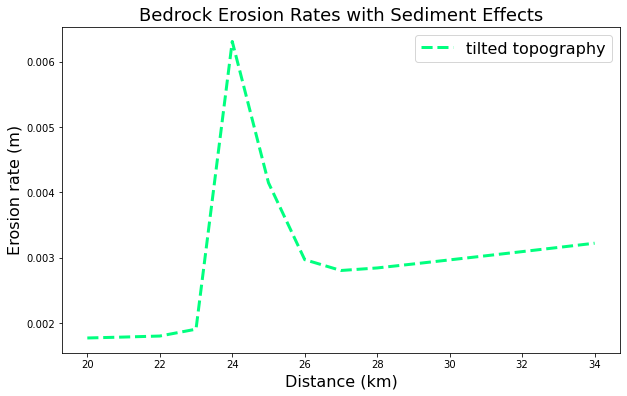

In [62]:
# moment of truth... see if we can make some plots
plt.figure(figsize = (10, 6))

plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_6_copy[20:35], color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# # plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_30_copy, label = '30')
# # plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_60_copy, label = '60')
# # plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_150_copy, label = '150')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_300_copy[20:35], color = 'mediumspringgreen', label = '300')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_600_copy[20:35], color = 'aquamarine', label = '600')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_1500_copy[20:35], color = 'lightseagreen',  label = '1500')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_3000_copy[20:35], color = 'deepskyblue', label = '3000')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_6000_copy[20:35], color = 'dodgerblue', label = '6000')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_30000_copy[20:35], color = 'royalblue', label = '30000')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_60000_copy[20:35], color = 'mediumblue', label = '60000')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_150000_copy[20:35], color = 'darkslateblue', label = '150000')
# # plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_300000_copy, label = '300000')
# plt.plot(x_2[20:35]/1000, bedrock_ero_rate_TL_copy[20:35], color = 'indigo', label = 'steady state', linewidth = 3)
# # plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Erosion rate (m)', fontsize = 16)
plt.title('Bedrock Erosion Rates with Sediment Effects', fontsize = 18)
plt.legend(fontsize = 16)
# plt.vlines(x = 24, ymin = -2000, ymax = -1500, color = 'k')
plt.show()

In [63]:
# huh, okay
# let's make some plots that just investigate the erosion effects at the contact
# first will need to make the experiments
tilted_eta_1 = tilted_eta_TL.copy()
tilted_etab_1 = tilted_etab_TL.copy()

tilted_eta_2 = tilted_eta_TL.copy()
tilted_etab_2 = tilted_etab_TL.copy()

tilted_eta_3 = tilted_eta_TL.copy()
tilted_etab_3 = tilted_etab_TL.copy()

tilted_eta_4 = tilted_eta_TL.copy()
tilted_etab_4 = tilted_etab_TL.copy()

tilted_eta_5 = tilted_eta_TL.copy()
tilted_etab_5 = tilted_etab_TL.copy()

tilted_eta_7 = tilted_eta_TL.copy()
tilted_etab_7 = tilted_etab_TL.copy()

tilted_eta_8 = tilted_eta_TL.copy()
tilted_etab_8 = tilted_etab_TL.copy()

tilted_eta_9 = tilted_eta_TL.copy()
tilted_etab_9 = tilted_etab_TL.copy()

tilted_eta_10 = tilted_eta_TL.copy()
tilted_etab_10 = tilted_etab_TL.copy()


tl_tilted_1 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_1, tilted_eta_1, 
               beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 1]

tl_tilted_2 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_2, tilted_eta_2, 
               beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 2]

tl_tilted_3 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_3, tilted_eta_3, 
               beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 3]

tl_tilted_4 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_4, tilted_eta_4, 
               beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 4]

tl_tilted_5 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_5, tilted_eta_5, 
               beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 5]

tl_tilted_7 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_7, tilted_eta_7, 
               beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 7]

tl_tilted_8 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_8, tilted_eta_8, 
               beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 8]

tl_tilted_9 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_9, tilted_eta_9, 
               beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 9]

tl_tilted_10 = [x_2, dx_2, q_2, Hstar_2, H_2, tilted_etab_10, tilted_eta_10, 
               beta_ig_2, beta_sed_2, k_ig_2, k_sed_2, 1, 0.001, 10]

In [64]:
(tilted_eta_TL_1, 
tilted_etab_TL_1,
tilted_S_TL_1,
tilted_efac_TL_1,
tilted_qs_TL_1,
tilted_ero_plucking_ig_TL_1, 
tilted_ero_plucking_sed_TL_1,
tilted_ero_ab_ig_TL_1,
tilted_ero_ab_sed_TL_1,
tilted_bedrock_ero_rate_TL_1, 
tilted_atr_TL_1, 
tilted_sedimentation_rate_TL_1, 
tilted_H_TL_1, 
tilted_total_ero_rate_TL_1) = two_lith_one_sed(*tl_tilted_1)

tilted_eta_TL_1_copy = tilted_eta_TL_1.copy()
tilted_etab_TL_1_copy = tilted_etab_TL_1.copy()
tilted_S_TL_1_copy = tilted_S_TL_1.copy()
tilted_efac_TL_1_copy = tilted_efac_TL_1.copy()
tilted_qs_TL_1_copy = tilted_qs_TL_1.copy()
tilted_ero_plucking_ig_TL_1_copy = tilted_ero_plucking_ig_TL_1.copy()
tilted_ero_plucking_sed_TL_1_copy = tilted_ero_plucking_sed_TL_1.copy()
tilted_ero_ab_ig_TL_1_copy = tilted_ero_ab_ig_TL_1.copy()
tilted_ero_ab_sed_TL_1_copy = tilted_ero_ab_sed_TL_1.copy()
tilted_bedrock_ero_rate_TL_1_copy = tilted_bedrock_ero_rate_TL_1.copy()
tilted_atr_TL_1_copy = tilted_atr_TL_1.copy()
tilted_sedimentation_rate_TL_1_copy = tilted_sedimentation_rate_TL_1.copy()
tilted_H_TL_1_copy = tilted_H_TL_1.copy()
tilted_total_ero_rate_TL_1_copy = tilted_total_ero_rate_TL_1.copy()

In [65]:
(tilted_eta_TL_2, 
tilted_etab_TL_2,
tilted_S_TL_2,
tilted_efac_TL_2,
tilted_qs_TL_2,
tilted_ero_plucking_ig_TL_2, 
tilted_ero_plucking_sed_TL_2,
tilted_ero_ab_ig_TL_2,
tilted_ero_ab_sed_TL_2,
tilted_bedrock_ero_rate_TL_2, 
tilted_atr_TL_2, 
tilted_sedimentation_rate_TL_2, 
tilted_H_TL_2, 
tilted_total_ero_rate_TL_2) = two_lith_one_sed(*tl_tilted_2)

tilted_eta_TL_2_copy = tilted_eta_TL_2.copy()
tilted_etab_TL_2_copy = tilted_etab_TL_2.copy()
tilted_S_TL_2_copy = tilted_S_TL_2.copy()
tilted_efac_TL_2_copy = tilted_efac_TL_2.copy()
tilted_qs_TL_2_copy = tilted_qs_TL_2.copy()
tilted_ero_plucking_ig_TL_2_copy = tilted_ero_plucking_ig_TL_2.copy()
tilted_ero_plucking_sed_TL_2_copy = tilted_ero_plucking_sed_TL_2.copy()
tilted_ero_ab_ig_TL_2_copy = tilted_ero_ab_ig_TL_2.copy()
tilted_ero_ab_sed_TL_2_copy = tilted_ero_ab_sed_TL_2.copy()
tilted_bedrock_ero_rate_TL_2_copy = tilted_bedrock_ero_rate_TL_2.copy()
tilted_atr_TL_2_copy = tilted_atr_TL_2.copy()
tilted_sedimentation_rate_TL_2_copy = tilted_sedimentation_rate_TL_2.copy()
tilted_H_TL_2_copy = tilted_H_TL_2.copy()
tilted_total_ero_rate_TL_2_copy = tilted_total_ero_rate_TL_2.copy()

In [66]:
(tilted_eta_TL_3, 
tilted_etab_TL_3,
tilted_S_TL_3,
tilted_efac_TL_3,
tilted_qs_TL_3,
tilted_ero_plucking_ig_TL_3, 
tilted_ero_plucking_sed_TL_3,
tilted_ero_ab_ig_TL_3,
tilted_ero_ab_sed_TL_3,
tilted_bedrock_ero_rate_TL_3, 
tilted_atr_TL_3, 
tilted_sedimentation_rate_TL_3, 
tilted_H_TL_3, 
tilted_total_ero_rate_TL_3) = two_lith_one_sed(*tl_tilted_3)

tilted_eta_TL_3_copy = tilted_eta_TL_3.copy()
tilted_etab_TL_3_copy = tilted_etab_TL_3.copy()
tilted_S_TL_3_copy = tilted_S_TL_3.copy()
tilted_efac_TL_3_copy = tilted_efac_TL_3.copy()
tilted_qs_TL_3_copy = tilted_qs_TL_3.copy()
tilted_ero_plucking_ig_TL_3_copy = tilted_ero_plucking_ig_TL_3.copy()
tilted_ero_plucking_sed_TL_3_copy = tilted_ero_plucking_sed_TL_3.copy()
tilted_ero_ab_ig_TL_3_copy = tilted_ero_ab_ig_TL_3.copy()
tilted_ero_ab_sed_TL_3_copy = tilted_ero_ab_sed_TL_3.copy()
tilted_bedrock_ero_rate_TL_3_copy = tilted_bedrock_ero_rate_TL_3.copy()
tilted_atr_TL_3_copy = tilted_atr_TL_3.copy()
tilted_sedimentation_rate_TL_3_copy = tilted_sedimentation_rate_TL_3.copy()
tilted_H_TL_3_copy = tilted_H_TL_3.copy()
tilted_total_ero_rate_TL_3_copy = tilted_total_ero_rate_TL_3.copy()

In [67]:
(tilted_eta_TL_4, 
tilted_etab_TL_4,
tilted_S_TL_4,
tilted_efac_TL_4,
tilted_qs_TL_4,
tilted_ero_plucking_ig_TL_4, 
tilted_ero_plucking_sed_TL_4,
tilted_ero_ab_ig_TL_4,
tilted_ero_ab_sed_TL_4,
tilted_bedrock_ero_rate_TL_4, 
tilted_atr_TL_4, 
tilted_sedimentation_rate_TL_4, 
tilted_H_TL_4, 
tilted_total_ero_rate_TL_4) = two_lith_one_sed(*tl_tilted_4)

tilted_eta_TL_4_copy = tilted_eta_TL_4.copy()
tilted_etab_TL_4_copy = tilted_etab_TL_4.copy()
tilted_S_TL_4_copy = tilted_S_TL_4.copy()
tilted_efac_TL_4_copy = tilted_efac_TL_4.copy()
tilted_qs_TL_4_copy = tilted_qs_TL_4.copy()
tilted_ero_plucking_ig_TL_4_copy = tilted_ero_plucking_ig_TL_4.copy()
tilted_ero_plucking_sed_TL_4_copy = tilted_ero_plucking_sed_TL_4.copy()
tilted_ero_ab_ig_TL_4_copy = tilted_ero_ab_ig_TL_4.copy()
tilted_ero_ab_sed_TL_4_copy = tilted_ero_ab_sed_TL_4.copy()
tilted_bedrock_ero_rate_TL_4_copy = tilted_bedrock_ero_rate_TL_4.copy()
tilted_atr_TL_4_copy = tilted_atr_TL_4.copy()
tilted_sedimentation_rate_TL_4_copy = tilted_sedimentation_rate_TL_4.copy()
tilted_H_TL_4_copy = tilted_H_TL_4.copy()
tilted_total_ero_rate_TL_4_copy = tilted_total_ero_rate_TL_4.copy()

In [68]:
(tilted_eta_TL_5, 
tilted_etab_TL_5,
tilted_S_TL_5,
tilted_efac_TL_5,
tilted_qs_TL_5,
tilted_ero_plucking_ig_TL_5, 
tilted_ero_plucking_sed_TL_5,
tilted_ero_ab_ig_TL_5,
tilted_ero_ab_sed_TL_5,
tilted_bedrock_ero_rate_TL_5, 
tilted_atr_TL_5, 
tilted_sedimentation_rate_TL_5, 
tilted_H_TL_5, 
tilted_total_ero_rate_TL_5) = two_lith_one_sed(*tl_tilted_5)

tilted_eta_TL_5_copy = tilted_eta_TL_5.copy()
tilted_etab_TL_5_copy = tilted_etab_TL_5.copy()
tilted_S_TL_5_copy = tilted_S_TL_5.copy()
tilted_efac_TL_5_copy = tilted_efac_TL_5.copy()
tilted_qs_TL_5_copy = tilted_qs_TL_5.copy()
tilted_ero_plucking_ig_TL_5_copy = tilted_ero_plucking_ig_TL_5.copy()
tilted_ero_plucking_sed_TL_5_copy = tilted_ero_plucking_sed_TL_5.copy()
tilted_ero_ab_ig_TL_5_copy = tilted_ero_ab_ig_TL_5.copy()
tilted_ero_ab_sed_TL_5_copy = tilted_ero_ab_sed_TL_5.copy()
tilted_bedrock_ero_rate_TL_5_copy = tilted_bedrock_ero_rate_TL_5.copy()
tilted_atr_TL_5_copy = tilted_atr_TL_5.copy()
tilted_sedimentation_rate_TL_5_copy = tilted_sedimentation_rate_TL_5.copy()
tilted_H_TL_5_copy = tilted_H_TL_5.copy()
tilted_total_ero_rate_TL_5_copy = tilted_total_ero_rate_TL_5.copy()

In [69]:
(tilted_eta_TL_7, 
tilted_etab_TL_7,
tilted_S_TL_7,
tilted_efac_TL_7,
tilted_qs_TL_7,
tilted_ero_plucking_ig_TL_7, 
tilted_ero_plucking_sed_TL_7,
tilted_ero_ab_ig_TL_7,
tilted_ero_ab_sed_TL_7,
tilted_bedrock_ero_rate_TL_7, 
tilted_atr_TL_7, 
tilted_sedimentation_rate_TL_7, 
tilted_H_TL_7, 
tilted_total_ero_rate_TL_7) = two_lith_one_sed(*tl_tilted_7)

tilted_eta_TL_7_copy = tilted_eta_TL_7.copy()
tilted_etab_TL_7_copy = tilted_etab_TL_7.copy()
tilted_S_TL_7_copy = tilted_S_TL_7.copy()
tilted_efac_TL_7_copy = tilted_efac_TL_7.copy()
tilted_qs_TL_7_copy = tilted_qs_TL_7.copy()
tilted_ero_plucking_ig_TL_7_copy = tilted_ero_plucking_ig_TL_7.copy()
tilted_ero_plucking_sed_TL_7_copy = tilted_ero_plucking_sed_TL_7.copy()
tilted_ero_ab_ig_TL_7_copy = tilted_ero_ab_ig_TL_7.copy()
tilted_ero_ab_sed_TL_7_copy = tilted_ero_ab_sed_TL_7.copy()
tilted_bedrock_ero_rate_TL_7_copy = tilted_bedrock_ero_rate_TL_7.copy()
tilted_atr_TL_7_copy = tilted_atr_TL_7.copy()
tilted_sedimentation_rate_TL_7_copy = tilted_sedimentation_rate_TL_7.copy()
tilted_H_TL_7_copy = tilted_H_TL_7.copy()
tilted_total_ero_rate_TL_7_copy = tilted_total_ero_rate_TL_7.copy()

In [70]:
(tilted_eta_TL_8, 
tilted_etab_TL_8,
tilted_S_TL_8,
tilted_efac_TL_8,
tilted_qs_TL_8,
tilted_ero_plucking_ig_TL_8, 
tilted_ero_plucking_sed_TL_8,
tilted_ero_ab_ig_TL_8,
tilted_ero_ab_sed_TL_8,
tilted_bedrock_ero_rate_TL_8, 
tilted_atr_TL_8, 
tilted_sedimentation_rate_TL_8, 
tilted_H_TL_8, 
tilted_total_ero_rate_TL_8) = two_lith_one_sed(*tl_tilted_8)

tilted_eta_TL_8_copy = tilted_eta_TL_8.copy()
tilted_etab_TL_8_copy = tilted_etab_TL_8.copy()
tilted_S_TL_8_copy = tilted_S_TL_8.copy()
tilted_efac_TL_8_copy = tilted_efac_TL_8.copy()
tilted_qs_TL_8_copy = tilted_qs_TL_8.copy()
tilted_ero_plucking_ig_TL_8_copy = tilted_ero_plucking_ig_TL_8.copy()
tilted_ero_plucking_sed_TL_8_copy = tilted_ero_plucking_sed_TL_8.copy()
tilted_ero_ab_ig_TL_8_copy = tilted_ero_ab_ig_TL_8.copy()
tilted_ero_ab_sed_TL_8_copy = tilted_ero_ab_sed_TL_8.copy()
tilted_bedrock_ero_rate_TL_8_copy = tilted_bedrock_ero_rate_TL_8.copy()
tilted_atr_TL_8_copy = tilted_atr_TL_8.copy()
tilted_sedimentation_rate_TL_8_copy = tilted_sedimentation_rate_TL_8.copy()
tilted_H_TL_8_copy = tilted_H_TL_8.copy()
tilted_total_ero_rate_TL_8_copy = tilted_total_ero_rate_TL_8.copy()

In [71]:
(tilted_eta_TL_9, 
tilted_etab_TL_9,
tilted_S_TL_9,
tilted_efac_TL_9,
tilted_qs_TL_9,
tilted_ero_plucking_ig_TL_9, 
tilted_ero_plucking_sed_TL_9,
tilted_ero_ab_ig_TL_9,
tilted_ero_ab_sed_TL_9,
tilted_bedrock_ero_rate_TL_9, 
tilted_atr_TL_9, 
tilted_sedimentation_rate_TL_9, 
tilted_H_TL_9, 
tilted_total_ero_rate_TL_9) = two_lith_one_sed(*tl_tilted_9)

tilted_eta_TL_9_copy = tilted_eta_TL_9.copy()
tilted_etab_TL_9_copy = tilted_etab_TL_9.copy()
tilted_S_TL_9_copy = tilted_S_TL_9.copy()
tilted_efac_TL_9_copy = tilted_efac_TL_9.copy()
tilted_qs_TL_9_copy = tilted_qs_TL_9.copy()
tilted_ero_plucking_ig_TL_9_copy = tilted_ero_plucking_ig_TL_9.copy()
tilted_ero_plucking_sed_TL_9_copy = tilted_ero_plucking_sed_TL_9.copy()
tilted_ero_ab_ig_TL_9_copy = tilted_ero_ab_ig_TL_9.copy()
tilted_ero_ab_sed_TL_9_copy = tilted_ero_ab_sed_TL_9.copy()
tilted_bedrock_ero_rate_TL_9_copy = tilted_bedrock_ero_rate_TL_9.copy()
tilted_atr_TL_9_copy = tilted_atr_TL_9.copy()
tilted_sedimentation_rate_TL_9_copy = tilted_sedimentation_rate_TL_9.copy()
tilted_H_TL_9_copy = tilted_H_TL_9.copy()
tilted_total_ero_rate_TL_9_copy = tilted_total_ero_rate_TL_9.copy()

In [72]:
(tilted_eta_TL_10, 
tilted_etab_TL_10,
tilted_S_TL_10,
tilted_efac_TL_10,
tilted_qs_TL_10,
tilted_ero_plucking_ig_TL_10, 
tilted_ero_plucking_sed_TL_10,
tilted_ero_ab_ig_TL_10,
tilted_ero_ab_sed_TL_10,
tilted_bedrock_ero_rate_TL_10, 
tilted_atr_TL_10, 
tilted_sedimentation_rate_TL_10, 
tilted_H_TL_10, 
tilted_total_ero_rate_TL_10) = two_lith_one_sed(*tl_tilted_10)

tilted_eta_TL_10_copy = tilted_eta_TL_10.copy()
tilted_etab_TL_10_copy = tilted_etab_TL_10.copy()
tilted_S_TL_10_copy = tilted_S_TL_10.copy()
tilted_efac_TL_10_copy = tilted_efac_TL_10.copy()
tilted_qs_TL_10_copy = tilted_qs_TL_10.copy()
tilted_ero_plucking_ig_TL_10_copy = tilted_ero_plucking_ig_TL_10.copy()
tilted_ero_plucking_sed_TL_10_copy = tilted_ero_plucking_sed_TL_10.copy()
tilted_ero_ab_ig_TL_10_copy = tilted_ero_ab_ig_TL_10.copy()
tilted_ero_ab_sed_TL_10_copy = tilted_ero_ab_sed_TL_10.copy()
tilted_bedrock_ero_rate_TL_10_copy = tilted_bedrock_ero_rate_TL_10.copy()
tilted_atr_TL_10_copy = tilted_atr_TL_10.copy()
tilted_sedimentation_rate_TL_10_copy = tilted_sedimentation_rate_TL_10.copy()
tilted_H_TL_10_copy = tilted_H_TL_10.copy()
tilted_total_ero_rate_TL_10_copy = tilted_total_ero_rate_TL_10.copy()

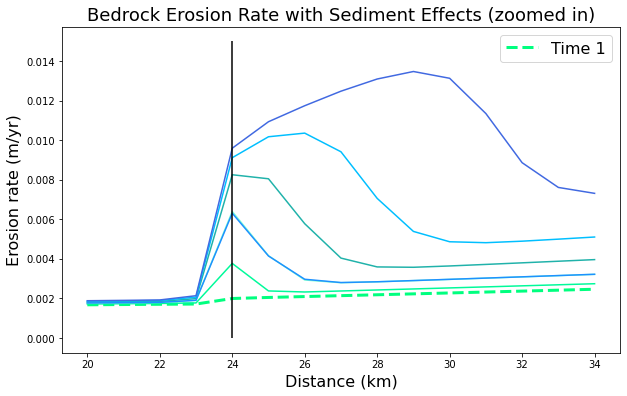

In [84]:
# check out bedrock erosion rates
plt.figure(figsize = (10, 6))

plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_1_copy[20:35], color = 'springgreen', label = 'Time 1', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_30_copy, label = '30')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_60_copy, label = '60')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_150_copy, label = '150')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_2_copy[20:35], color = 'mediumspringgreen')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_3_copy[20:35], color = 'aquamarine')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_4_copy[20:35], color = 'lightseagreen')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_5_copy[20:35], color = 'deepskyblue')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_6_copy[20:35], color = 'dodgerblue')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_7_copy[20:35], color = 'royalblue')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_8_copy[22:28], color = 'mediumblue', label = '60000')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_9_copy[22:28], color = 'darkslateblue', label = '150000')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_300000_copy, label = '300000')
# plt.plot(x_2[20:35]/1000, eta_TL_copy[20:35], color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Erosion rate (m/yr)', fontsize = 16)
plt.title('Bedrock Erosion Rate with Sediment Effects (zoomed in)', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = 0, ymax = 0.015, color = 'k')
plt.show()

In [139]:
ss_ero_rate = np.zeros(len(x_2))
ss_ero_rate[:] = 0.001

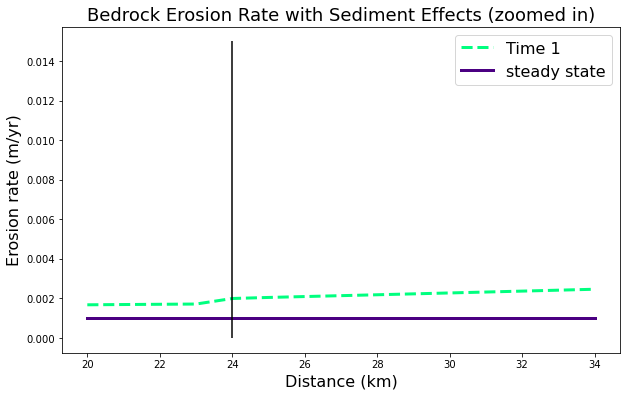

In [144]:
plt.figure(figsize = (10, 6))
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_1_copy[20:35], color = 'springgreen', label = 'Time 1', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_30_copy, label = '30')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_60_copy, label = '60')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_150_copy, label = '150')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_2_copy[20:35], color = 'mediumspringgreen')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_3_copy[20:35], color = 'aquamarine')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_4_copy[20:35], color = 'lightseagreen')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_5_copy[20:35], color = 'deepskyblue')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_6_copy[20:35], color = 'dodgerblue')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_7_copy[20:35], color = 'royalblue')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_8_copy[22:28], color = 'mediumblue', label = '60000')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_9_copy[22:28], color = 'darkslateblue', label = '150000')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_300000_copy, label = '300000')
plt.plot(x_2[20:35]/1000, ss_ero_rate[20:35], color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Erosion rate (m/yr)', fontsize = 16)
plt.title('Bedrock Erosion Rate with Sediment Effects (zoomed in)', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = 0, ymax = 0.015, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_bedrock_ero_evolution/1.png')

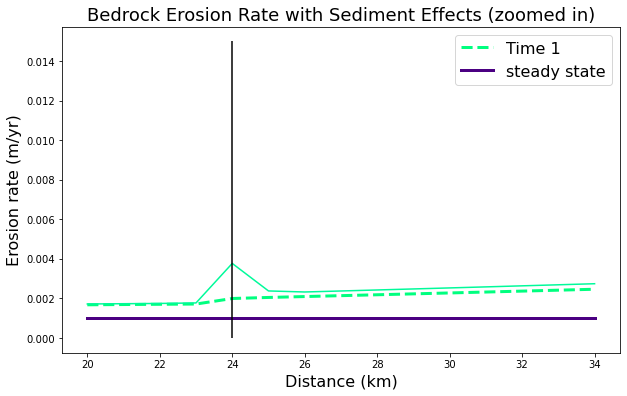

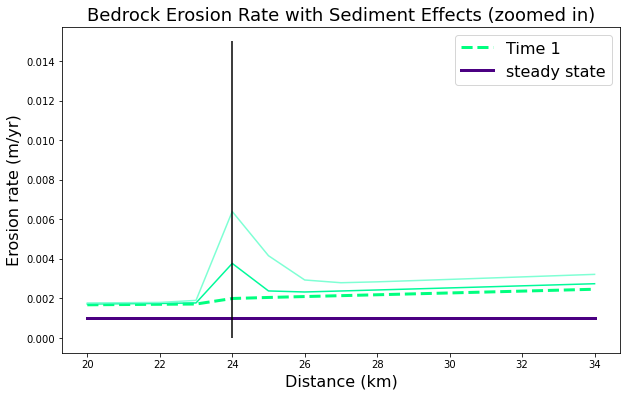

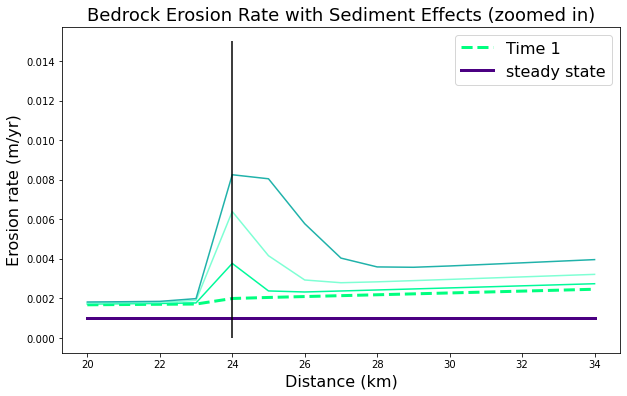

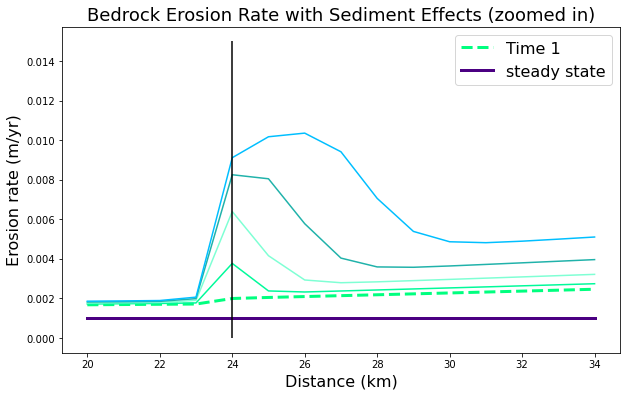

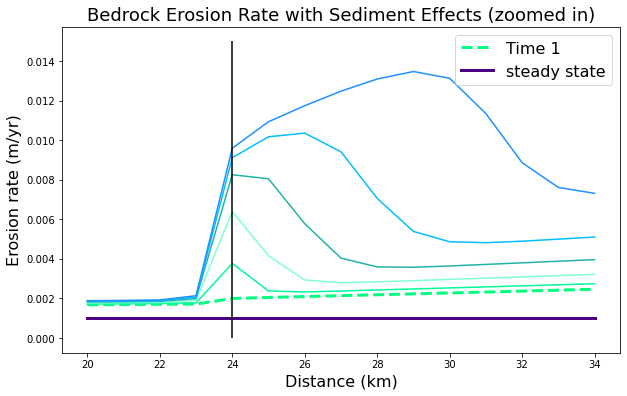

In [145]:
plt.figure(figsize = (10, 6))
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_1_copy[20:35], color = 'springgreen', label = 'Time 1', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_30_copy, label = '30')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_60_copy, label = '60')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_150_copy, label = '150')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_2_copy[20:35], color = 'mediumspringgreen')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_3_copy[20:35], color = 'aquamarine')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_4_copy[20:35], color = 'lightseagreen')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_5_copy[20:35], color = 'deepskyblue')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_6_copy[20:35], color = 'dodgerblue')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_7_copy[20:35], color = 'royalblue')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_8_copy[22:28], color = 'mediumblue', label = '60000')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_9_copy[22:28], color = 'darkslateblue', label = '150000')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_300000_copy, label = '300000')
plt.plot(x_2[20:35]/1000, ss_ero_rate[20:35], color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Erosion rate (m/yr)', fontsize = 16)
plt.title('Bedrock Erosion Rate with Sediment Effects (zoomed in)', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = 0, ymax = 0.015, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_bedrock_ero_evolution/2.png')

plt.figure(figsize = (10, 6))
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_1_copy[20:35], color = 'springgreen', label = 'Time 1', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_30_copy, label = '30')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_60_copy, label = '60')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_150_copy, label = '150')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_2_copy[20:35], color = 'mediumspringgreen')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_3_copy[20:35], color = 'aquamarine')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_4_copy[20:35], color = 'lightseagreen')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_5_copy[20:35], color = 'deepskyblue')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_6_copy[20:35], color = 'dodgerblue')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_7_copy[20:35], color = 'royalblue')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_8_copy[22:28], color = 'mediumblue', label = '60000')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_9_copy[22:28], color = 'darkslateblue', label = '150000')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_300000_copy, label = '300000')
plt.plot(x_2[20:35]/1000, ss_ero_rate[20:35], color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Erosion rate (m/yr)', fontsize = 16)
plt.title('Bedrock Erosion Rate with Sediment Effects (zoomed in)', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = 0, ymax = 0.015, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_bedrock_ero_evolution/3.png')

plt.figure(figsize = (10, 6))
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_1_copy[20:35], color = 'springgreen', label = 'Time 1', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_30_copy, label = '30')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_60_copy, label = '60')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_150_copy, label = '150')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_2_copy[20:35], color = 'mediumspringgreen')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_3_copy[20:35], color = 'aquamarine')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_4_copy[20:35], color = 'lightseagreen')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_5_copy[20:35], color = 'deepskyblue')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_6_copy[20:35], color = 'dodgerblue')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_7_copy[20:35], color = 'royalblue')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_8_copy[22:28], color = 'mediumblue', label = '60000')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_9_copy[22:28], color = 'darkslateblue', label = '150000')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_300000_copy, label = '300000')
plt.plot(x_2[20:35]/1000, ss_ero_rate[20:35], color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Erosion rate (m/yr)', fontsize = 16)
plt.title('Bedrock Erosion Rate with Sediment Effects (zoomed in)', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = 0, ymax = 0.015, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_bedrock_ero_evolution/4.png')

plt.figure(figsize = (10, 6))
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_1_copy[20:35], color = 'springgreen', label = 'Time 1', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_30_copy, label = '30')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_60_copy, label = '60')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_150_copy, label = '150')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_2_copy[20:35], color = 'mediumspringgreen')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_3_copy[20:35], color = 'aquamarine')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_4_copy[20:35], color = 'lightseagreen')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_5_copy[20:35], color = 'deepskyblue')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_6_copy[20:35], color = 'dodgerblue')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_7_copy[20:35], color = 'royalblue')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_8_copy[22:28], color = 'mediumblue', label = '60000')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_9_copy[22:28], color = 'darkslateblue', label = '150000')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_300000_copy, label = '300000')
plt.plot(x_2[20:35]/1000, ss_ero_rate[20:35], color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Erosion rate (m/yr)', fontsize = 16)
plt.title('Bedrock Erosion Rate with Sediment Effects (zoomed in)', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = 0, ymax = 0.015, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_bedrock_ero_evolution/5.png')

# plt.figure(figsize = (10, 6))
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_1_copy[20:35], color = 'springgreen', label = 'Time 1', linestyle = '--', linewidth = 3)
# # plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_30_copy, label = '30')
# # plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_60_copy, label = '60')
# # plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_150_copy, label = '150')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_2_copy[20:35], color = 'mediumspringgreen')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_3_copy[20:35], color = 'aquamarine')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_4_copy[20:35], color = 'lightseagreen')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_5_copy[20:35], color = 'deepskyblue')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_6_copy[20:35], color = 'dodgerblue')
# # plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_7_copy[20:35], color = 'royalblue')
# # plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_8_copy[22:28], color = 'mediumblue', label = '60000')
# # plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_9_copy[22:28], color = 'darkslateblue', label = '150000')
# # plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_300000_copy, label = '300000')
# plt.plot(x_2[20:35]/1000, ss_ero_rate[20:35], color = 'indigo', label = 'steady state', linewidth = 3)
# # plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
# plt.xlabel('Distance (km)', fontsize = 16)
# plt.ylabel('Erosion rate (m/yr)', fontsize = 16)
# plt.title('Bedrock Erosion Rate with Sediment Effects (zoomed in)', fontsize = 18)
# plt.legend(fontsize = 16)
# plt.vlines(x = 24, ymin = 0, ymax = 0.015, color = 'k')
# plt.savefig('hydrosymposium figs/tl_tilt_bedrock_ero_evolution/6.png')

plt.figure(figsize = (10, 6))
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_1_copy[20:35], color = 'springgreen', label = 'Time 1', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_30_copy, label = '30')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_60_copy, label = '60')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_150_copy, label = '150')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_2_copy[20:35], color = 'mediumspringgreen')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_3_copy[20:35], color = 'aquamarine')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_4_copy[20:35], color = 'lightseagreen')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_5_copy[20:35], color = 'deepskyblue')
# plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_6_copy[20:35], color = 'dodgerblue')
plt.plot(x_2[20:35]/1000, tilted_bedrock_ero_rate_TL_7_copy[20:35], color = 'dodgerblue')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_8_copy[22:28], color = 'mediumblue', label = '60000')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_9_copy[22:28], color = 'darkslateblue', label = '150000')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_300000_copy, label = '300000')
plt.plot(x_2[20:35]/1000, ss_ero_rate[20:35], color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Erosion rate (m/yr)', fontsize = 16)
plt.title('Bedrock Erosion Rate with Sediment Effects (zoomed in)', fontsize = 18)
plt.legend(loc = 'upper right', fontsize = 16)
plt.vlines(x = 24, ymin = 0, ymax = 0.015, color = 'k')
plt.savefig('hydrosymposium figs/tl_tilt_bedrock_ero_evolution/7.png')

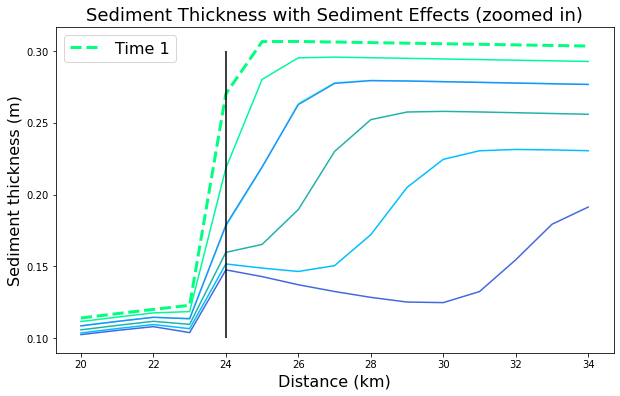

In [92]:
# check out bedrock erosion rates
plt.figure(figsize = (10, 6))

plt.plot(x_2[20:35]/1000, tilted_H_TL_1_copy[20:35], color = 'springgreen', label = 'Time 1', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_30_copy, label = '30')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_60_copy, label = '60')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_150_copy, label = '150')
plt.plot(x_2[20:35]/1000, tilted_H_TL_2_copy[20:35], color = 'mediumspringgreen')
plt.plot(x_2[20:35]/1000, tilted_H_TL_3_copy[20:35], color = 'aquamarine')
plt.plot(x_2[20:35]/1000, tilted_H_TL_4_copy[20:35], color = 'lightseagreen')
plt.plot(x_2[20:35]/1000, tilted_H_TL_5_copy[20:35], color = 'deepskyblue')
plt.plot(x_2[20:35]/1000, tilted_H_TL_6_copy[20:35], color = 'dodgerblue')
plt.plot(x_2[20:35]/1000, tilted_H_TL_7_copy[20:35], color = 'royalblue')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_8_copy[22:28], color = 'mediumblue', label = '60000')
# plt.plot(x_2[22:28]/1000, tilted_bedrock_ero_rate_TL_9_copy[22:28], color = 'darkslateblue', label = '150000')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_300000_copy, label = '300000')
# plt.plot(x_2[20:35]/1000, eta_TL_copy[20:35], color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Sediment thickness (m)', fontsize = 16)
plt.title('Sediment Thickness with Sediment Effects (zoomed in)', fontsize = 18)
plt.legend(fontsize = 16)
plt.vlines(x = 24, ymin = 0.1, ymax = 0.3, color = 'k')
plt.show()

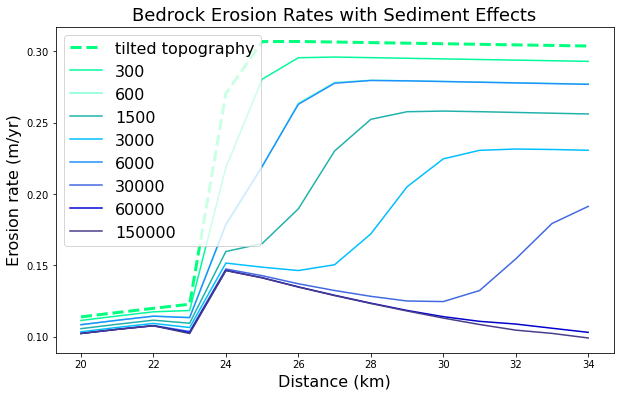

In [77]:
plt.figure(figsize = (10, 6))

plt.plot(x_2[20:35]/1000, tilted_H_TL_1_copy[20:35], color = 'springgreen', label = 'tilted topography', linestyle = '--', linewidth = 3)
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_30_copy, label = '30')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_60_copy, label = '60')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_150_copy, label = '150')
plt.plot(x_2[20:35]/1000, tilted_H_TL_2_copy[20:35], color = 'mediumspringgreen', label = '300')
plt.plot(x_2[20:35]/1000, tilted_H_TL_3_copy[20:35], color = 'aquamarine', label = '600')
plt.plot(x_2[20:35]/1000, tilted_H_TL_4_copy[20:35], color = 'lightseagreen',  label = '1500')
plt.plot(x_2[20:35]/1000, tilted_H_TL_5_copy[20:35], color = 'deepskyblue', label = '3000')
plt.plot(x_2[20:35]/1000, tilted_H_TL_6_copy[20:35], color = 'dodgerblue', label = '6000')
plt.plot(x_2[20:35]/1000, tilted_H_TL_7_copy[20:35], color = 'royalblue', label = '30000')
plt.plot(x_2[20:35]/1000, tilted_H_TL_8_copy[20:35], color = 'mediumblue', label = '60000')
plt.plot(x_2[20:35]/1000, tilted_H_TL_9_copy[20:35], color = 'darkslateblue', label = '150000')
# plt.plot(x_2/1000, tilted_bedrock_ero_rate_TL_300000_copy, label = '300000')
plt.plot(x_2[20:35]/1000, H_TL_copy[20:35], color = 'indigo', label = 'steady state', linewidth = 3)
# plt.plot(x_2/1000, tilted_eta_SP_copy + tilted_diff, label = 'tilted topo', linestyle = '--', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Erosion rate (m/yr)', fontsize = 16)
plt.title('Bedrock Erosion Rates with Sediment Effects', fontsize = 18)
plt.legend(fontsize = 16)
# plt.vlines(x = 24, ymin = -2000, ymax = -1500, color = 'k')
plt.show()

In [ ]:
# first test if I can get it back to ss with tilted profile IF I revert to old q formula
# this means commenting out r_mtn, r_pln

In [ ]:
# now see if I can get a copied and pasted version of the two lithology model working
# and then tweak things, OAT, to see what the issue is with loooooong runtimes on this single lith model

# SET UP GRID ARRAYS
dx_2 = 1000
x_2 = np.arange(0, 100000, dx_2)

# set up runoff rate
# r_2 = np.zeros(len(x_2))
# r_2[:] = 0.3
r_mtn_2 = 0.3
r_pln_2 = 0.3

# set up references to topography
Hstar_2 = 0.1
H_2 = Hstar_2 + np.zeros(len(x_2))
etab_2 = -H_2
eta_2 = etab_2 + H_2

# abrasion coefficients from Attal and Lave 2006 in % per km
beta_ig_2 = np.zeros(len(x_2))
beta_ig_2[:25] = 0.00004
beta_sed_2 = np.zeros(len(x_2))
beta_sed_2[25:] = 0.00014
atr_factor_2 = 0.00004

# erodibility values
k_ig_2 = np.zeros(len(x_2))
k_ig_2[:25] = 0.0001
k_sed_2 = np.zeros(len(x_2))
k_sed_2[25:] = 0.001

In [ ]:
# write a function that has two bedrock lithologies in the domain, but only one contributing sediment to bedload
def two_lith_one_sed(x,
                     dx,
                     Hstar,
                     H,
                     etab,
                     eta,
                     beta_ig,
                     beta_sed,
                     atr_factor,
                     k_ig,
                     k_sed,
                     r_mtn,
                     r_pln,
                     c = 1,
                     baselevel_rate = 0.001,
                     num_steps = 250000, 
                     porosity = 0.55):
    
    H[-1] = 0.0
    bedrock_ero = np.zeros(len(x))  # bedrock erosion rate
    sedimentation_rate = np.zeros(len(x))
    total_ero = np.zeros(len(x))
    total_ero[-1] = baselevel_rate
    
    x_m = x[24]
    q = np.zeros(len(x))
    mtns = np.where(x <= x_m)[0]
    q_mtns = r_mtn * x[mtns]
    q_plns = q_mtns[-1] + (r_pln * (x[25:] - x_m))
    q = np.concatenate((q_mtns, q_plns), axis = 0)
    
    # q = r * x  # discharge = distance downstream (first node is left edge of 0th cell)
    qs = np.zeros(len(x))  # first node is left edge of 0th cell
    dt_global = 0.2 * dx * dx / (c*q[-1])  # "global" time-step size
    run_duration = dt_global * num_steps  # <== here's how long we want to run
    cum_time = 0.0  # <== keep track of elapsed time

    #for i in range(num_steps):
    while cum_time < run_duration:  # <== use a while loop because dt varies by iteration
        

        # first calculate rates
        
        #  calc slope
        S = -np.diff(eta)/dx
        
        #  calculate e factor
        efac = np.exp(- H / Hstar)
        
        #  calculate total bedload sed flux and set boundary condition
        qs[1:] = c * q[1:] * S * (1.0 - efac[:-1])
        qs[0] = 0
        
        #  calc bedrock erosion from stream power (plucking)
        ero_plucking_ig = efac[:-1] * (k_ig[1:] * q[1:] * S)
        ero_plucking_sed = efac[:-1] * (k_sed[1:] * q[1:] * S)
        
        #  calc bedrock erosion from abrasion
        ero_ab_ig = efac[:-1] * (beta_ig[:-1] * qs[1:])   # <== change indexing: qs[1] represents node 0
        ero_ab_sed = efac[:-1] * (beta_sed[:-1] * qs[1:])
        
        #  calc bedrock erosion rate from stream power and abrasion
        bedrock_ero[:-1] = ero_plucking_ig + ero_plucking_sed + ero_ab_ig + ero_ab_sed
        
        #  calc grain attrition rate
        atr = atr_factor * qs[1:]
        
        #  calc rate of change in alluvial thickness
        sedimentation_rate[:-1] = -((1 / porosity) * ((np.diff(qs)/dx) + atr - ero_plucking_ig))
        
        
        # Calculate maximum allowable time-step size
        
        #  track total erosion rate
        total_ero[:-1] = bedrock_ero[:-1] - sedimentation_rate[:-1]  # <== erosion is MINUS sed rate
        
        #  set adaptive timestep
        #  first check time to flat surface
        elev_diff = np.diff(eta)/dx
        ero_diff = np.diff(total_ero)/dx
        #valid_places = np.where(ero_diff < 0)
        valid_places = np.where(ero_diff < 0)[0]  # <== we just want the array, not the full tuple from where()
        if len(valid_places) > 0:  # <== in case there ARE no locations...
            times_to_flat = np.abs(elev_diff[valid_places]/ero_diff[valid_places])
        else:
            times_to_flat = np.array([dt_global])  # <== ...we just revert to the global dt
        min_time_to_flat = np.amin(times_to_flat)

        #  then check time to deplete all sediment
        #sed_depletion_locations = np.where(sedimentation_rate < 0)
        sed_depletion_locations = np.where(sedimentation_rate < 0)[0]  # <== we just want the array, not the full tuple from where()
        if len(sed_depletion_locations) > 0:  # <== in case there ARE no locations...
            times_to_no_sed = np.abs(H[sed_depletion_locations]/sedimentation_rate[sed_depletion_locations])
        else:
            times_to_no_sed = np.array([dt_global])  # <== ...we just revert to the global dt
        min_time_to_no_sed = np.amin(times_to_no_sed)

        #  check for smaller condition
        dt = min(min_time_to_flat, min_time_to_no_sed)

        #  if larger than global step size, limit to global
        dt = min(dt, dt_global)
        
        
        # Update quantities
        
        #  lower baselevel
        eta[-1] -= baselevel_rate * dt 
        
        #  set boundary conditions
        etab[-1] = eta[-1]
        
        #  calc change in bedrock elev
        etab[:-1] -= bedrock_ero[:-1] * dt
        
        #  update sediment thickness
        H[:-1] += sedimentation_rate[:-1] * dt
        H[H < 0] = 0

        #  update elev
        eta[:-1] = etab[:-1] + H[:-1]
        
        # Advance time
        cum_time += dt
        
        if any(total_ero[:] != baselevel_rate):
            continue
        else:
            break
            
    print(cum_time)
        
    return (S, qs, efac, eta, etab, ero_plucking_ig, ero_plucking_sed, ero_ab_ig, ero_ab_sed, bedrock_ero, atr, 
            sedimentation_rate, H, total_ero, cum_time)

In [ ]:
# create the input experiment
TL_ss = [x_2, 
         dx_2, 
         Hstar_2, 
         H_2, 
         etab_2, 
         eta_2, 
         beta_ig_2, 
         beta_sed_2, 
         atr_factor_2, 
         k_ig_2, 
         k_sed_2, 
         r_mtn_2,
         r_pln_2]

# and run away with it!
(slope_TL,
 sed_flux_TL,
 e_factor_TL,
 topography_TL,
 bedrock_elevation_TL,
 igneous_plucking_rate_TL,
 sedimentary_plucking_rate_TL,
 igneous_abrasion_rate_TL,
 sedimentary_abrasion_rate_TL,
 bedrock_erosion_rate_TL,
 attrition_rate_TL,
 sedimentation_rate_TL,
 sediment_thickness_TL,
 total_erosion_rate_TL,
 cum_time_TL) = two_lith_one_sed(*TL_ss)

In [ ]:
# okay, that worked!
# check to see if we're at steady state
print(total_erosion_rate_TL)

In [ ]:
# and now tilt the topography
tilted_eta_TL = topography_TL + upstream_tilt_factor

# and check to make sure it looks right
plt.plot(x_2, topography_TL)
plt.plot(x_2, tilted_eta_TL)
plt.show()

In [ ]:
# now make copies
slope_TL_copy = slope_TL.copy()
sed_flux_TL_copy = sed_flux_TL.copy()
e_factor_TL_copy = e_factor_TL.copy()
topography_TL_copy = topography_TL.copy()
bedrock_elevation_TL_copy = bedrock_elevation_TL.copy()
igneous_plucking_rate_TL_copy = igneous_plucking_rate_TL.copy()
sedimentary_plucking_rate_TL_copy = sedimentary_plucking_rate_TL.copy()
igneous_abrasion_rate_TL_copy = igneous_abrasion_rate_TL.copy()
sedimentary_abrasion_rate_TL_copy = sedimentary_abrasion_rate_TL.copy()
bedrock_erosion_rate_TL_copy = bedrock_erosion_rate_TL.copy()
attrition_rate_TL_copy = attrition_rate_TL.copy()
sedimentation_rate_TL_copy = sedimentation_rate_TL.copy()
sediment_thickness_TL_copy = sediment_thickness_TL.copy()
total_erosion_rate_TL_copy = total_erosion_rate_TL.copy()
cum_time_TL_copy = cum_time_TL.copy()

In [ ]:
# now design new exp using tilted topo
TL_ss_rainy = [x_2, 
                dx_2, 
                Hstar_2, 
                H_2, 
                etab_2, 
                eta_2, 
                beta_ig_2, 
                beta_sed_2, 
                atr_factor_2, 
                k_ig_2, 
                k_sed_2, 
                r_mtn_2 * 2,
                r_pln_2]

# and run away with it!
(rainy_slope_TL,
 rainy_sed_flux_TL,
 rainy_e_factor_TL,
 rainy_topography_TL,
 rainy_bedrock_elevation_TL,
 rainy_igneous_plucking_rate_TL,
 rainy_sedimentary_plucking_rate_TL,
 rainy_igneous_abrasion_rate_TL,
 rainy_sedimentary_abrasion_rate_TL,
 rainy_bedrock_erosion_rate_TL,
 rainy_attrition_rate_TL,
 rainy_sedimentation_rate_TL,
 rainy_sediment_thickness_TL,
 rainy_total_erosion_rate_TL,
 rainy_cum_time_TL) = two_lith_one_sed(*TL_ss_rainy)

In [ ]:
# and check for ss
print(rainy_total_erosion_rate_TL)

In [ ]:
# okay, so still an open question as to whether we want to start with a single steady state condition 
# (leaning towards this option), or do both of these

# honestly, maybe just start with a one lithology ss profile so that it's perfectly smooth, concave-up
# that might illustrate the point best without uncessary complexity
# yeah, let's do that

# starting from above

In [ ]:
# okay, so
# we now want to study the impact of the stream reacting to uplift or increasing discharge

# here's what we need to do:

# DONE # 1. rerun sp scenario, but now with lith contact. Get it to ss.
# DONE # 2. impose tilting
# DONE # 3. rerun back to steady state

# DONE # 4. run tl scenario with lith contact. Get it to ss.
# DONE # 5. impose tilting
# 6. rerun back to ss

# DONE # 7. figure out how to write discharge as an intergral sum
# 8. increase discharge (runoff rate) in mountains - think glacial melting
# 9. implement this in both models